In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
mkt_share = pd.read_excel('Smartphone Market Share 5 Year.xlsx', 
                          sheet_name = '5 Year Market Share', 
                          index_col='Company')
production = pd.read_excel('Smartphone Market Share 5 Year.xlsx', 
                           sheet_name = '5 Year # of Phone Produced',
                           nrows=6,
                           index_col='Company')
flagship = pd.read_excel('Smartphone Market Share 5 Year.xlsx', 
                          sheet_name = '5 Year Price of Flagship', 
                          index_col='Company')

In [6]:
mkt_share = mkt_share.transpose()
production = production.transpose()
flagship = flagship.transpose()

Text(0, 0.5, 'Market Share (%)')

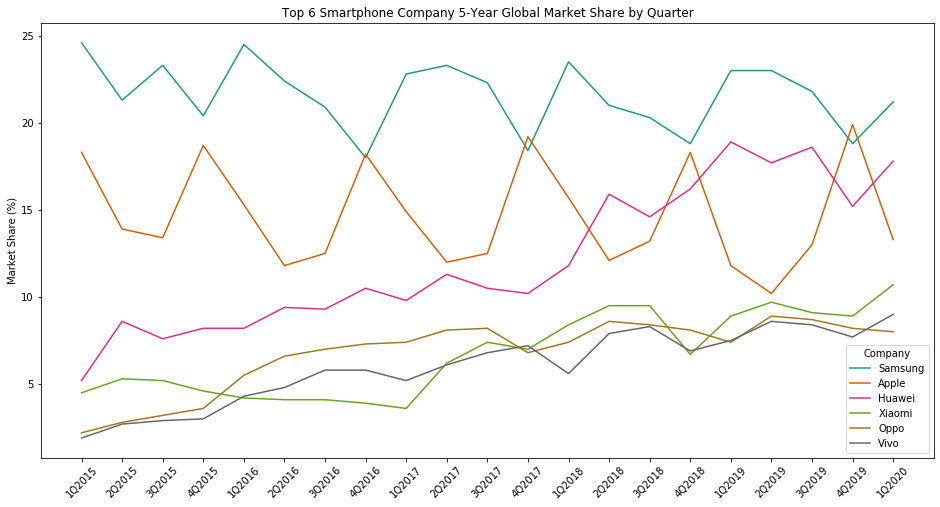

In [4]:
ax1 = mkt_share.plot(figsize=(16, 8), xticks=range(0,21), rot=45, colormap='Dark2', 
               title='Top 6 Smartphone Company 5-Year Global Market Share by Quarter')
ax1.set_ylabel('Market Share (%)')

Text(0, 0.5, 'Units shipped (in million)')

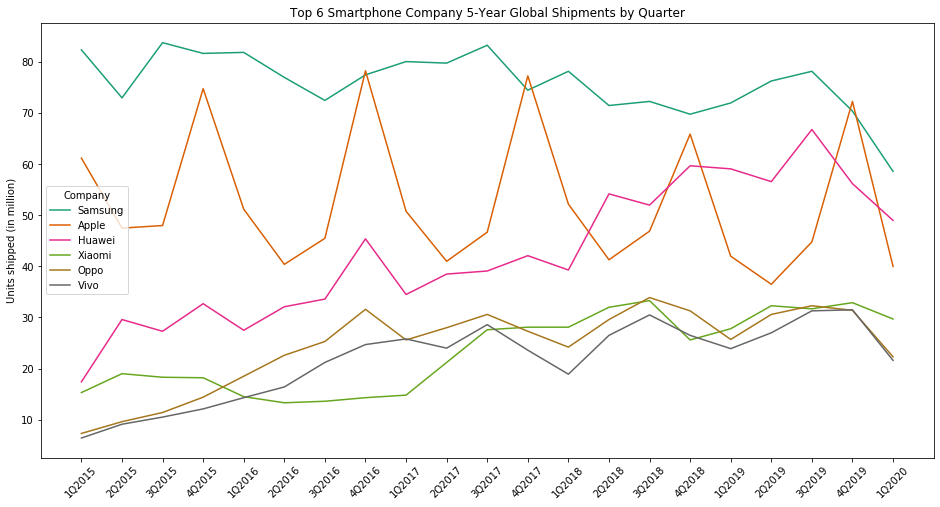

In [5]:
ax2 = production.plot(figsize=(16, 8), xticks=range(0,21), rot=45, colormap='Dark2', 
                title='Top 6 Smartphone Company 5-Year Global Shipments by Quarter')
ax2.set_ylabel('Units shipped (in million)')

Text(0, 0.5, 'Price ($)')

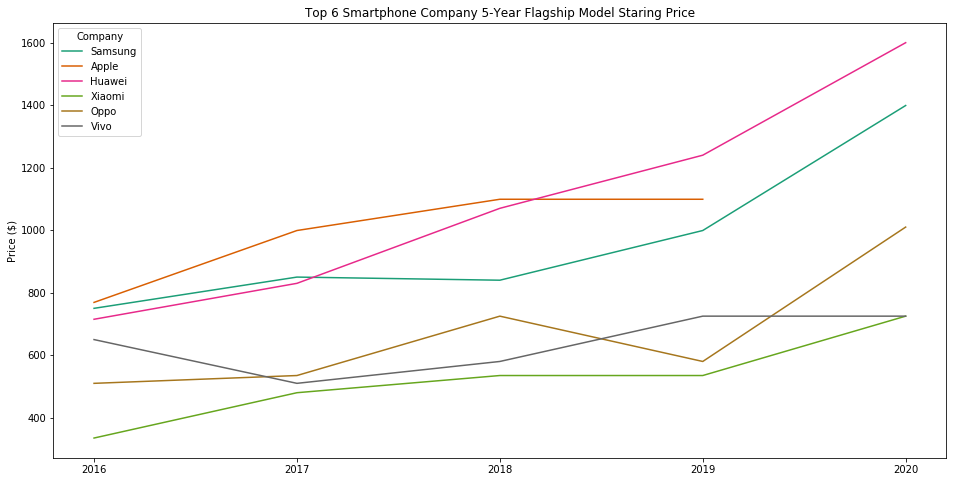

In [6]:
ax3 = flagship.plot(figsize=(16, 8), xticks=range(2016, 2021), colormap='Dark2', 
              title='Top 6 Smartphone Company 5-Year Flagship Model Staring Price')
ax3.set_ylabel('Price ($)')

In [7]:
# ARIMA Forecast

In [8]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [275]:
com = 'Samsung'
df = mkt_share[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=90.727, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=92.342, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=91.787, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=190.812, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.150 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:                        SARIMAX   Log Likelihood                 -43.364
Date:                Mon, 24 Aug 2020   AIC                             90.727
Time:                        23:00:52   BIC                             92.816
Sample:                             0   HQIC                            91.180
                                 - 21                                         
Covarianc

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


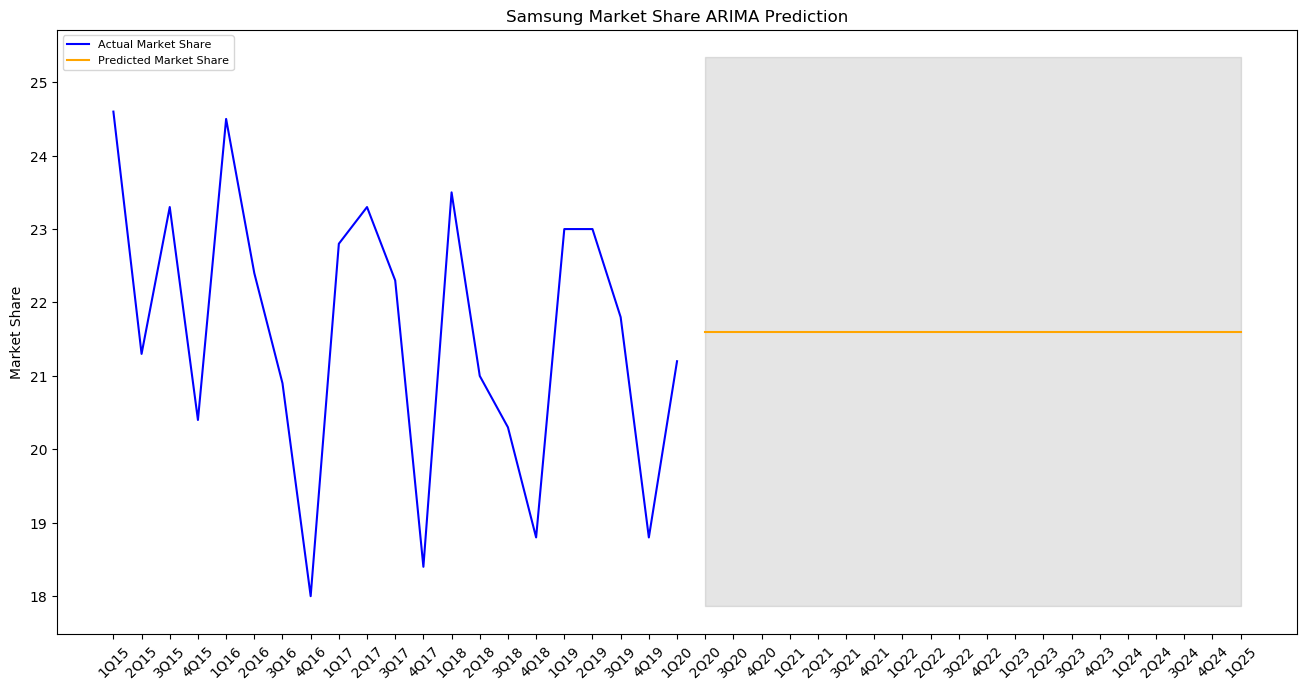

In [277]:
model = ARIMA(df, order=(0, 0, 0))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Market Share ARIMA Prediction')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [278]:
com = 'Apple'
df = mkt_share[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=107.889, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=109.676, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=105.830, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=175.205, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=157.198, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.313 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -49.915
Date:                Mon, 24 Aug 2020   AIC                            105.830
Time:                        23:01:31   BIC             

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


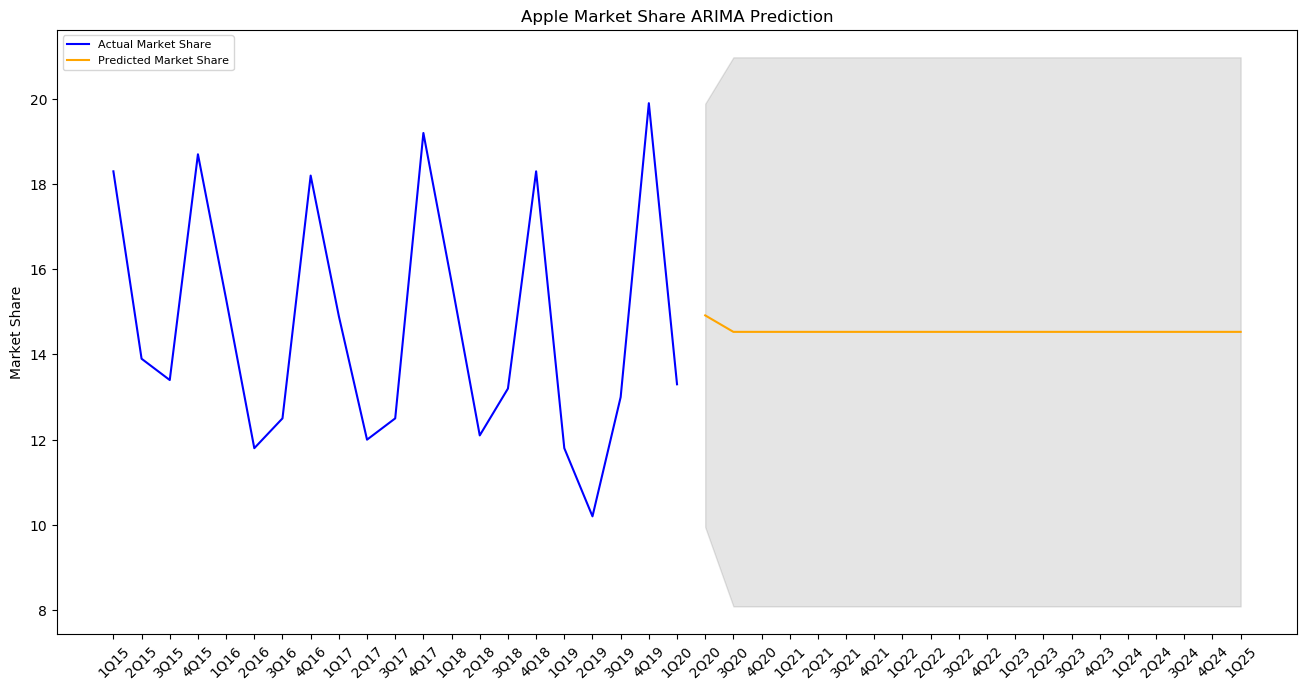

In [279]:
model = ARIMA(df, order=(0, 0, 1))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Market Share ARIMA Prediction')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [280]:
com = 'Huawei'
df = mkt_share[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=96.854, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=87.472, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=86.948, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=86.034, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=87.747, Time=0.02 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 0.249 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(3, 2, 0)   Log Likelihood                 -39.017
Date:                Mon, 24 Aug 2020   AIC                             86.034
Time:                        23:01:58   BIC                  

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


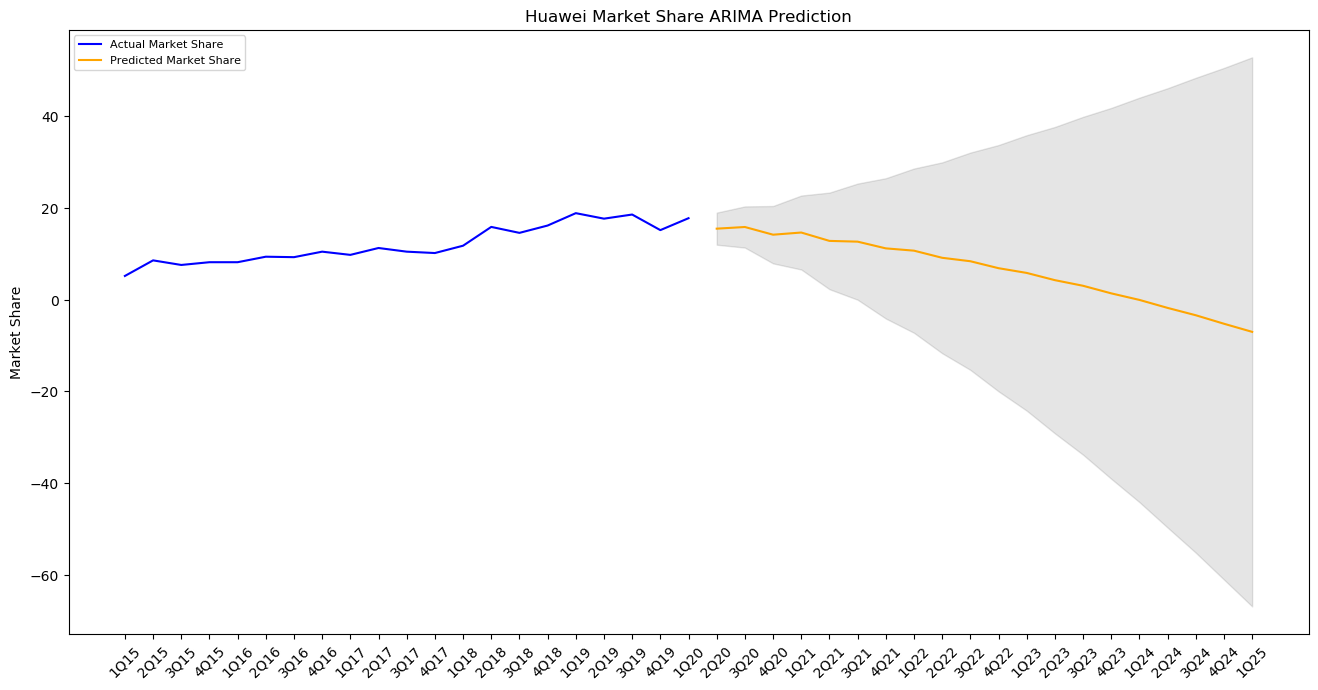

In [281]:
model = ARIMA(df, order=(3, 2, 0))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Market Share ARIMA Prediction')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [282]:
com = 'Xiaomi'
df = mkt_share[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=77.654, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=77.187, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=72.004, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=67.574, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=69.455, Time=0.02 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 0.250 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(3, 2, 0)   Log Likelihood                 -29.787
Date:                Mon, 24 Aug 2020   AIC                             67.574
Time:                        23:02:22   BIC                  

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


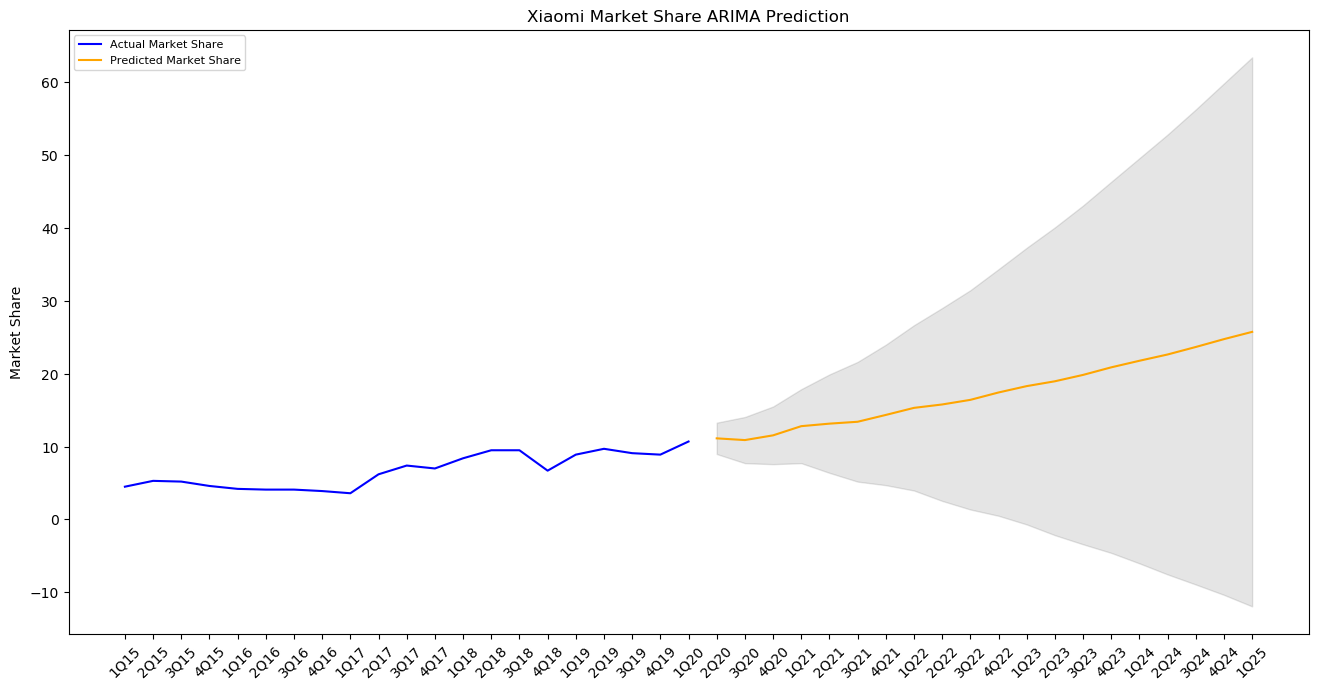

In [283]:
model = ARIMA(df, order=(3, 2, 0))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Market Share ARIMA Prediction')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [284]:
com = 'Oppo'
df = mkt_share[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=49.756, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=51.623, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=51.488, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=50.478, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.176 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -22.878
Date:                Mon, 24 Aug 2020   AIC                             49.756
Time:                        23:02:47   BIC                             51.747
Sample:                             0   HQIC                            50.145
                                 - 21                                         
Covariance

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


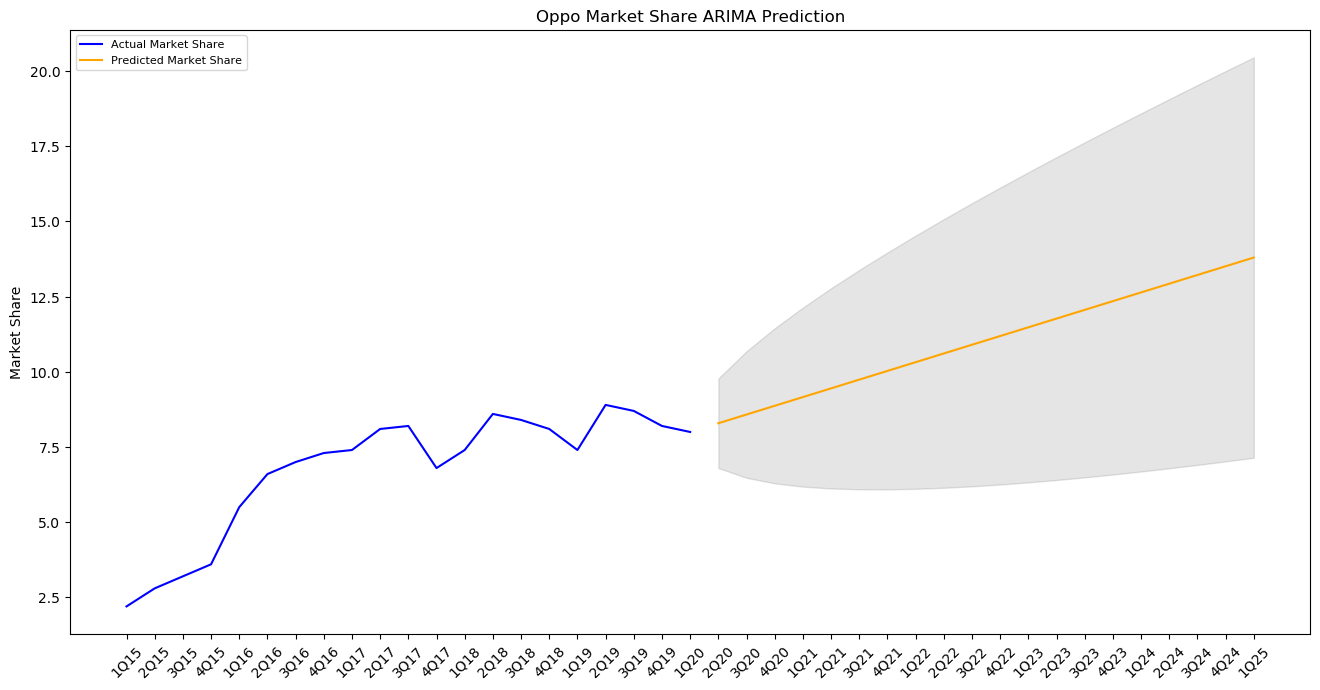

In [285]:
model = ARIMA(df, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Market Share ARIMA Prediction')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [286]:
com = 'Vivo'
df = mkt_share[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=57.138, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57.042, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=52.212, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57.952, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=54.188, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=54.296, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=58.888, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.261 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -23.106
Date:                Mon, 24 Aug 2020   AIC                             52.212
Time:                        23:03:09   BIC            

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


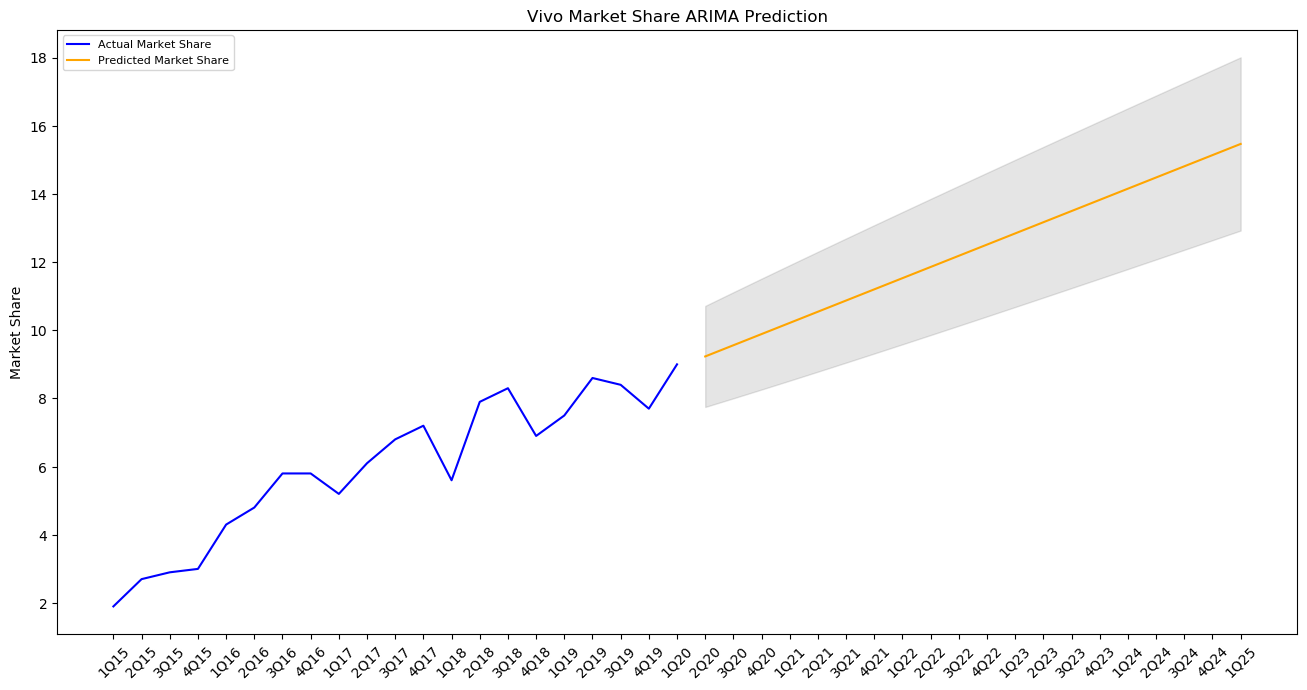

In [288]:
model = ARIMA(df, order=(0, 1, 1))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Market Share ARIMA Prediction')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [29]:
#Shipment Forecast

In [366]:
com = 'Samsung'
df = production[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=136.924, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=129.917, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=131.912, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=131.908, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=131.601, Time=0.02 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.236 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 -62.959
Date:                Tue, 25 Aug 2020   AIC                            129.917
Time:                        17:21:19   BIC                            131.806
Sample:                             0 

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


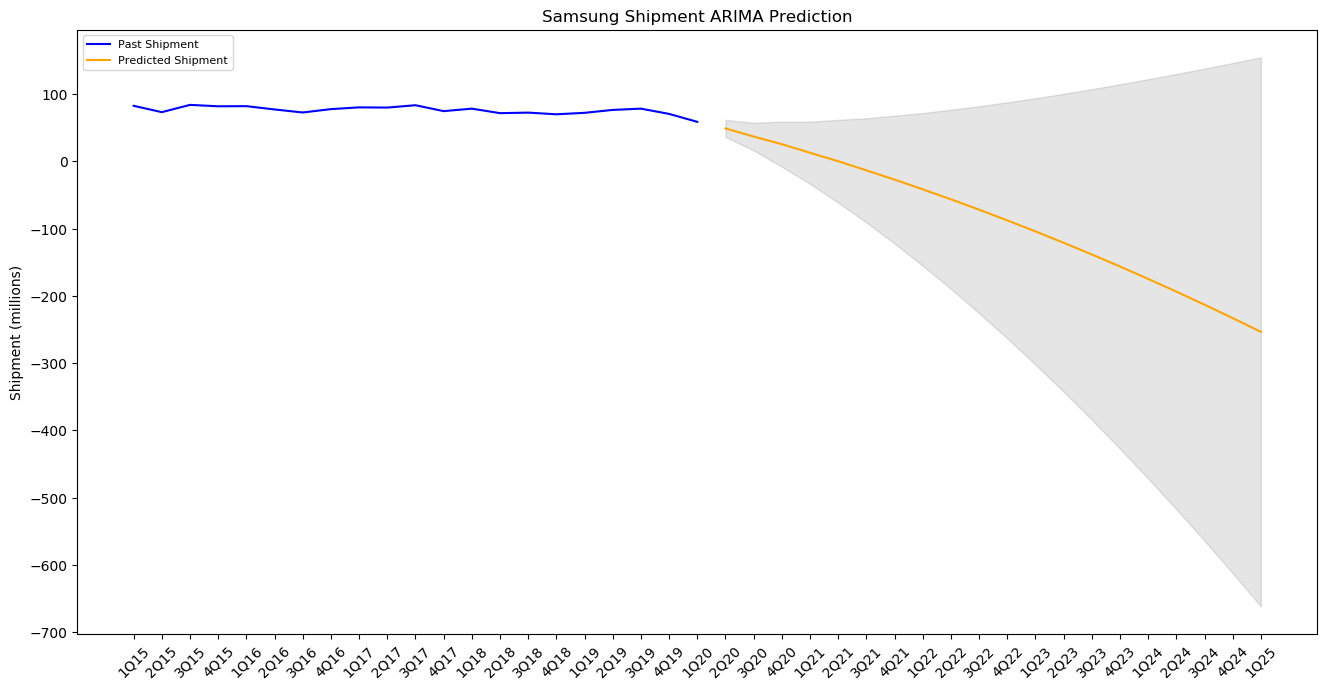

In [367]:
model = ARIMA(df, order=(1, 2, 0))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Shipment ARIMA Prediction')
plt.ylabel('Shipment (millions)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [368]:
com = 'Apple'
df = production[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=171.476, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=172.868, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=169.141, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=229.283, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=169.226, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=171.187, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=214.337, Time=0.01 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.253 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 -81.570
Date:                Tue, 25 Aug 2020   AIC                            169.141
Time:                        17:21:42   BIC     

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


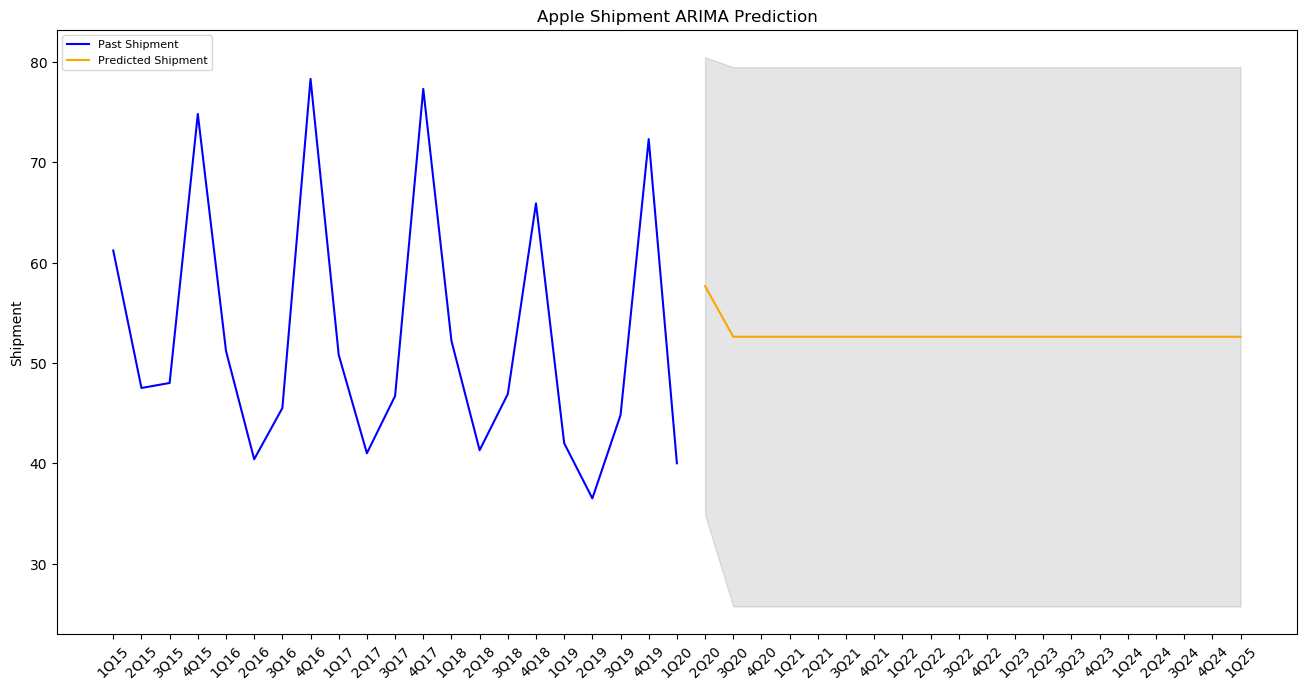

In [369]:
model = ARIMA(df, order=(0, 0, 1))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Shipment ARIMA Prediction')
plt.ylabel('Shipment')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [370]:
com = 'Huawei'
df = production[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=150.537, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=137.305, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=137.529, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=135.163, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=137.161, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=137.160, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.306 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(1, 2, 1)   Log Likelihood                 -64.581
Date:    

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


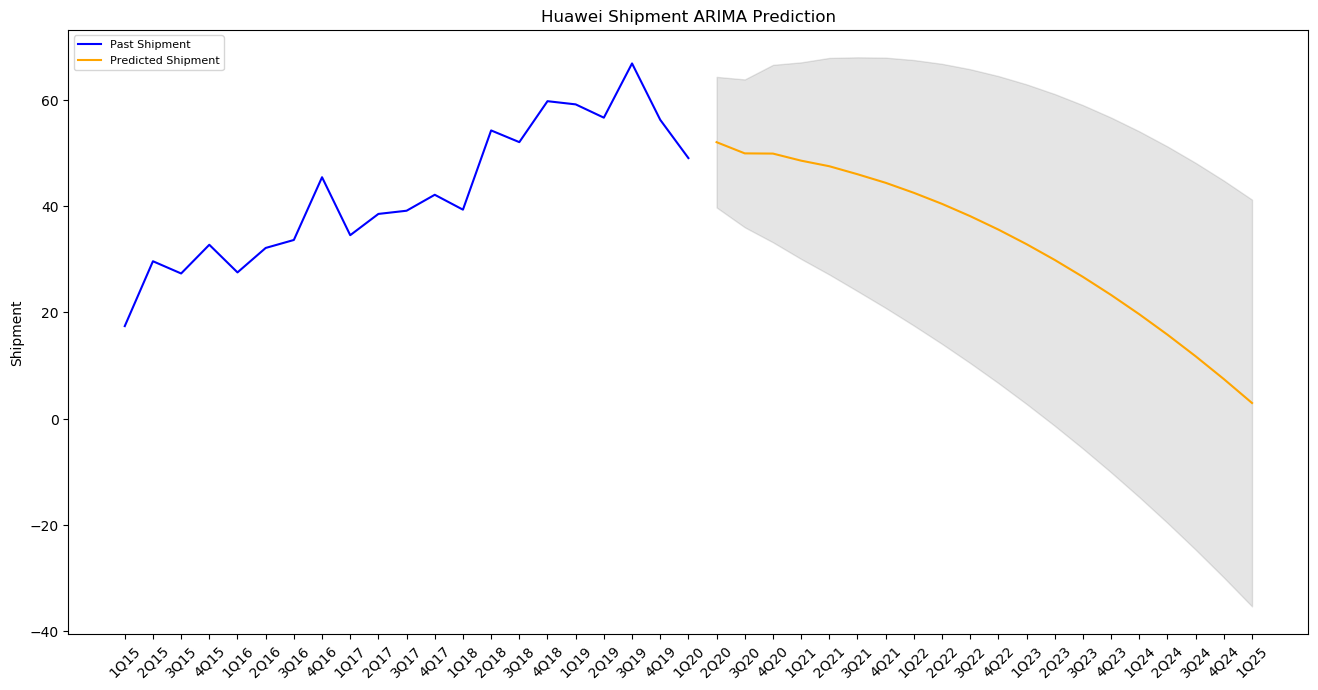

In [371]:
model = ARIMA(df, order=(1, 2, 1))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Shipment ARIMA Prediction')
plt.ylabel('Shipment')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [372]:
com = 'Xiaomi'
df = production[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=112.132, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=112.830, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=114.002, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.111 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -55.066
Date:                Tue, 25 Aug 2020   AIC                            112.132
Time:                        17:22:54   BIC                            113.077
Sample:                             0   HQIC                           112.292
                                 - 21                                         
Covariance

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


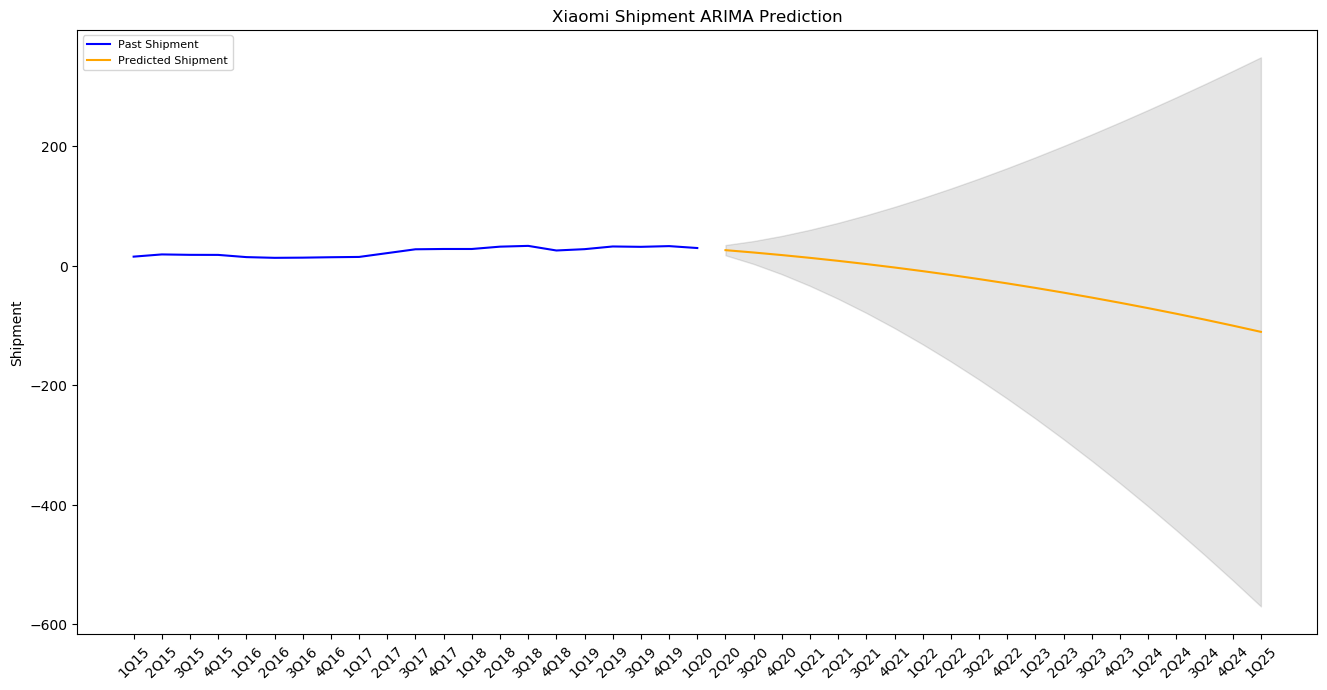

In [373]:
model = ARIMA(df, order=(0, 2, 0))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Shipment ARIMA Prediction')
plt.ylabel('Shipment')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [374]:
com = 'Oppo'
df = production[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=118.126, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=120.125, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=120.120, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=116.755, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=121.917, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.084 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -57.378
Date:                Tue, 25 Aug 2020   AIC                            116.755
Time:                        17:23:16   BIC                            117.751
Sample:                             0   HQIC                           116.950
                                 - 21                                         
Co

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


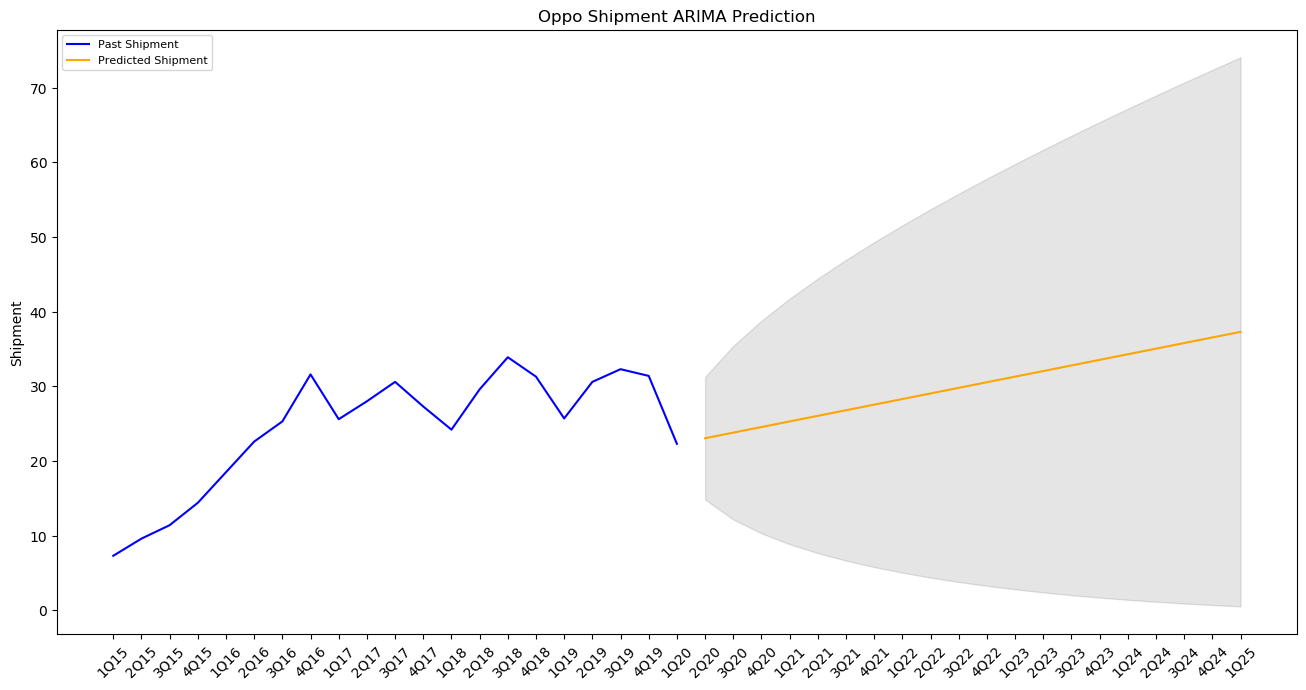

In [375]:
model = ARIMA(df, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Shipment ARIMA Prediction')
plt.ylabel('Shipment')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [376]:
com = 'Vivo'
df = production[[com]]
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      test='adf', 
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=119.565, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=121.387, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=115.618, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=117.472, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=115.348, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.381 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 2, 2)   Log Likelihood                 -54.674
Date:                Tue, 25 Aug 2020   AIC                            115

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


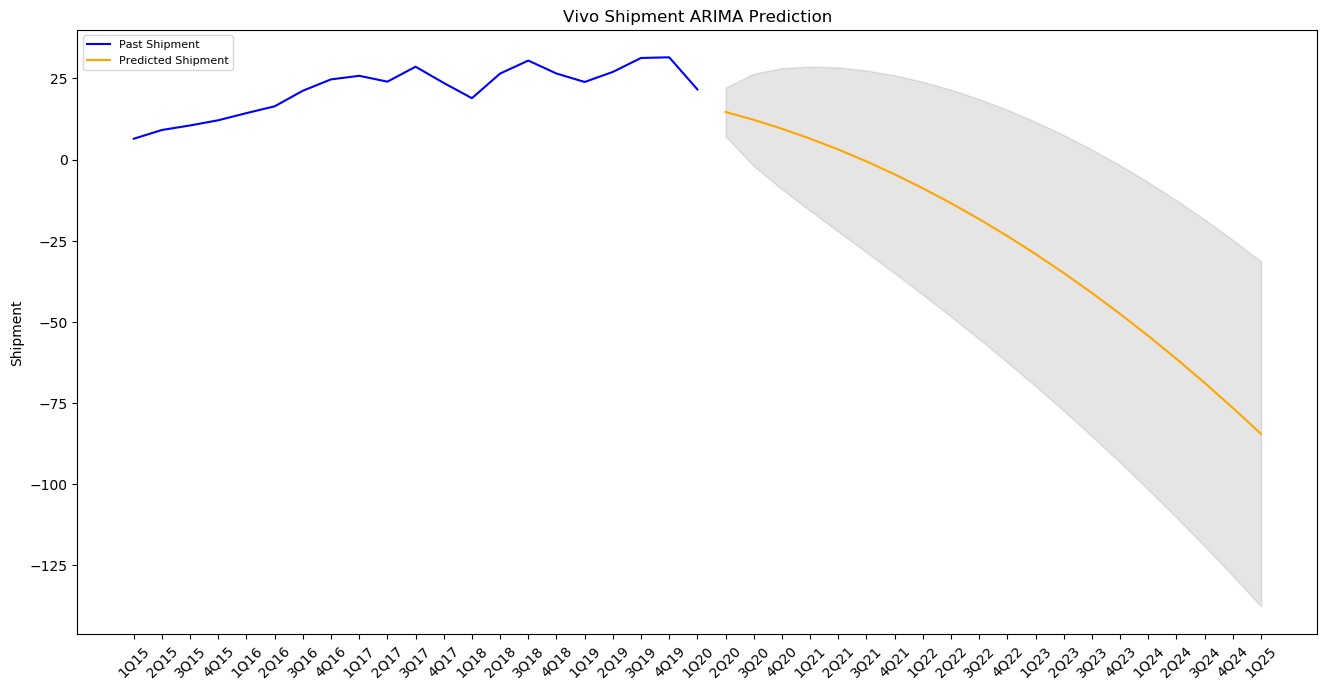

In [377]:
model = ARIMA(df, order=(0, 2, 2))  
fitted = model.fit(disp=-1)  
arima_window = 20
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(15, 25):
    for m in range(1, 5):
        indexq.append(str(m) + 'Q' + str(n))
indexq.append('1Q25')
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Shipment ARIMA Prediction')
plt.ylabel('Shipment')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=8)

In [49]:
#Flagship Price Forecast

In [379]:
com = 'Samsung'
df = flagship[[com]].astype(float)
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=72.571, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=73.957, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=85.212, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.222 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                        SARIMAX   Log Likelihood                 -34.286
Date:                Tue, 25 Aug 2020   AIC                             72.571
Time:                        18:01:50   BIC                             71.790
Sample:                             0   HQIC                            70.475
                                  - 5                                         
Covariance Ty

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


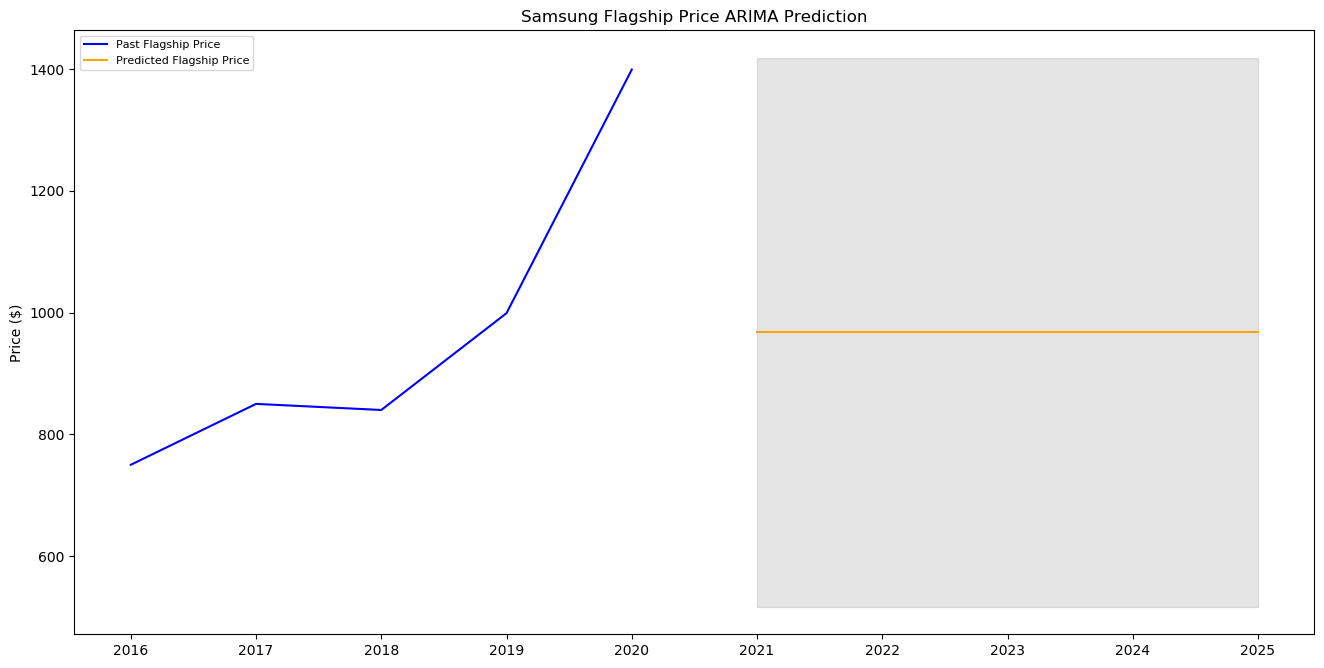

In [380]:
model = ARIMA(df, order=(0, 0, 0))  
fitted = model.fit(disp=-1)  
arima_window = 5
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(2016, 2026):
    indexq.append(str(n))
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Flagship Price ARIMA Prediction')
plt.ylabel('Price ($)')
plt.legend(loc='upper left', fontsize=8)

In [381]:
com = 'Apple'
df = flagship[[com]].iloc[0:4].astype(float)
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=54.581, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=56.343, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=nan, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=68.619, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.118 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    4
Model:                        SARIMAX   Log Likelihood                 -25.291
Date:                Tue, 25 Aug 2020   AIC                             54.581
Time:                        18:02:13   BIC                             53.354
Sample:                             0   HQIC                            51.888
                                  - 4                                         
Covariance Ty

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py:3048: UserWarning: Early subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)
/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/mlemodel.py:3053: UserWarning: Later subset of data for variable 0  has too few non-missing observations to calculate test statistic.
  ' calculate test statistic.' % i)


/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


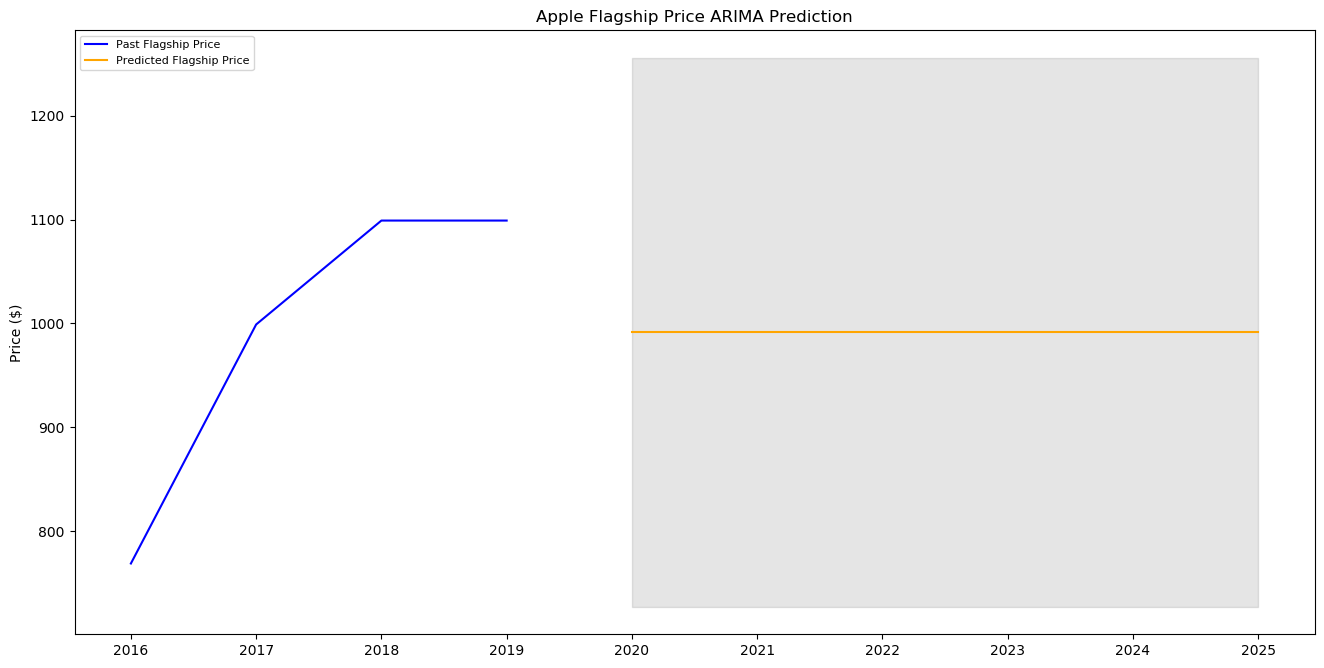

In [382]:
model = ARIMA(df, order=(0, 0, 0))  
fitted = model.fit(disp=-1)  
arima_window = 6
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(2016, 2026):
    indexq.append(str(n))
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Flagship Price ARIMA Prediction')
plt.ylabel('Price ($)')
plt.legend(loc='upper left', fontsize=8)

In [383]:
com = 'Huawei'
df = flagship[[com]].astype(float)
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=75.665, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=75.619, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=86.534, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=76.215, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.209 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -34.810
Date:                Tue, 25 Aug 2020   AIC                             75.619
Time:                        18:02:47   BIC                             74.448
Sample:                             0   HQIC                            72.475
                            

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


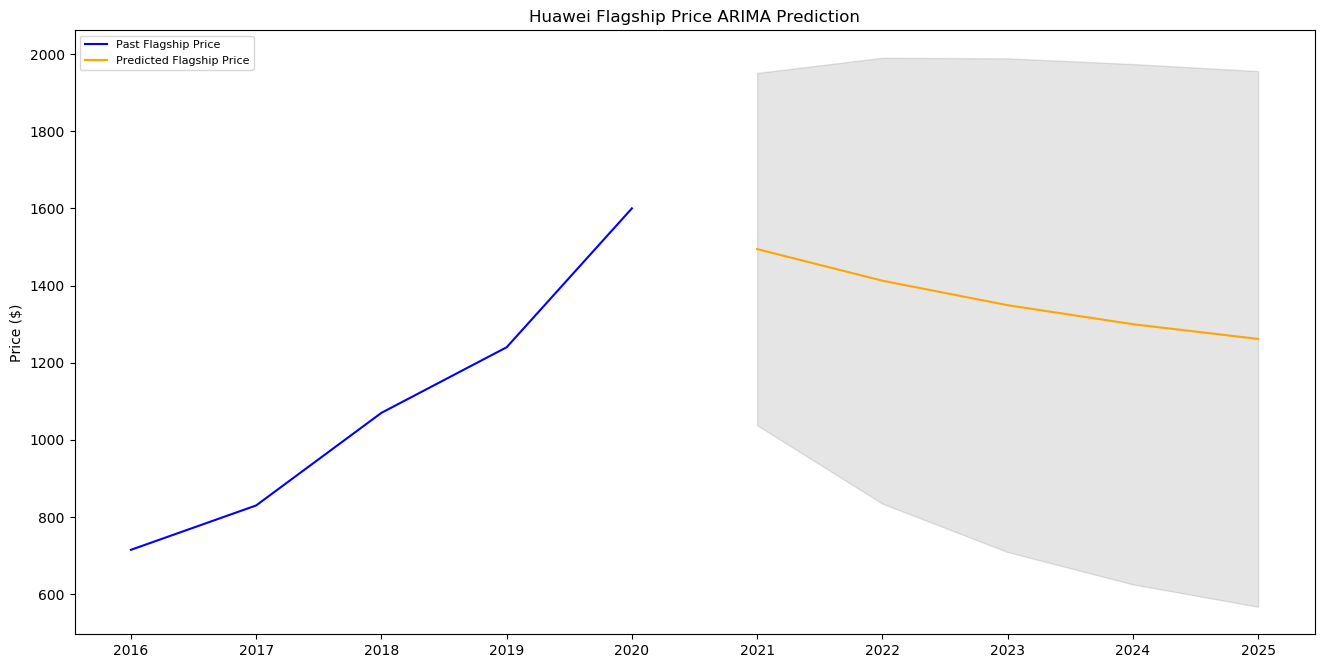

In [384]:
model = ARIMA(df, order=(1, 0, 0))  
fitted = model.fit(disp=-1)  
arima_window = 5
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(2016, 2026):
    indexq.append(str(n))
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Flagship Price ARIMA Prediction')
plt.ylabel('Price ($)')
plt.legend(loc='upper left', fontsize=8)

In [385]:
com = 'Xiaomi'
df = flagship[[com]].astype(float)
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=66.482, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=68.130, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=79.045, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=74.692, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.179 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                        SARIMAX   Log Likelihood                 -31.241
Date:                Tue, 25 Aug 2020   AIC                             66.482
Time:                        18:03:09   BIC                             65.701
Sample:                             0   HQIC                            64.386
                                  - 5                                         
Covariance

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


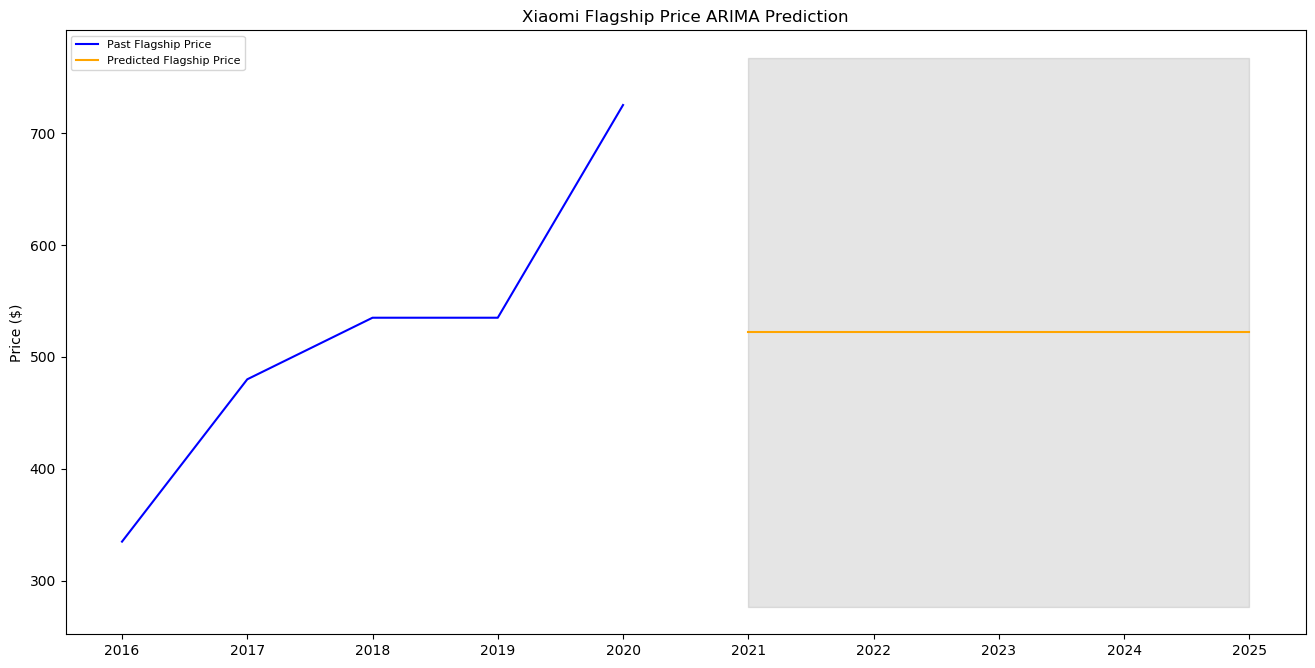

In [386]:
model = ARIMA(df, order=(0, 0, 0))  
fitted = model.fit(disp=-1)  
arima_window = 5
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(2016, 2026):
    indexq.append(str(n))
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Flagship Price ARIMA Prediction')
plt.ylabel('Price ($)')
plt.legend(loc='upper left', fontsize=8)

In [387]:
com = 'Oppo'
df = flagship[[com]].astype(float)
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=70.376, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=72.149, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=81.656, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.173 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                        SARIMAX   Log Likelihood                 -33.188
Date:                Tue, 25 Aug 2020   AIC                             70.376
Time:                        18:03:29   BIC                             69.594
Sample:                             0   HQIC                            68.279
                                  - 5                                         
Covariance Ty

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


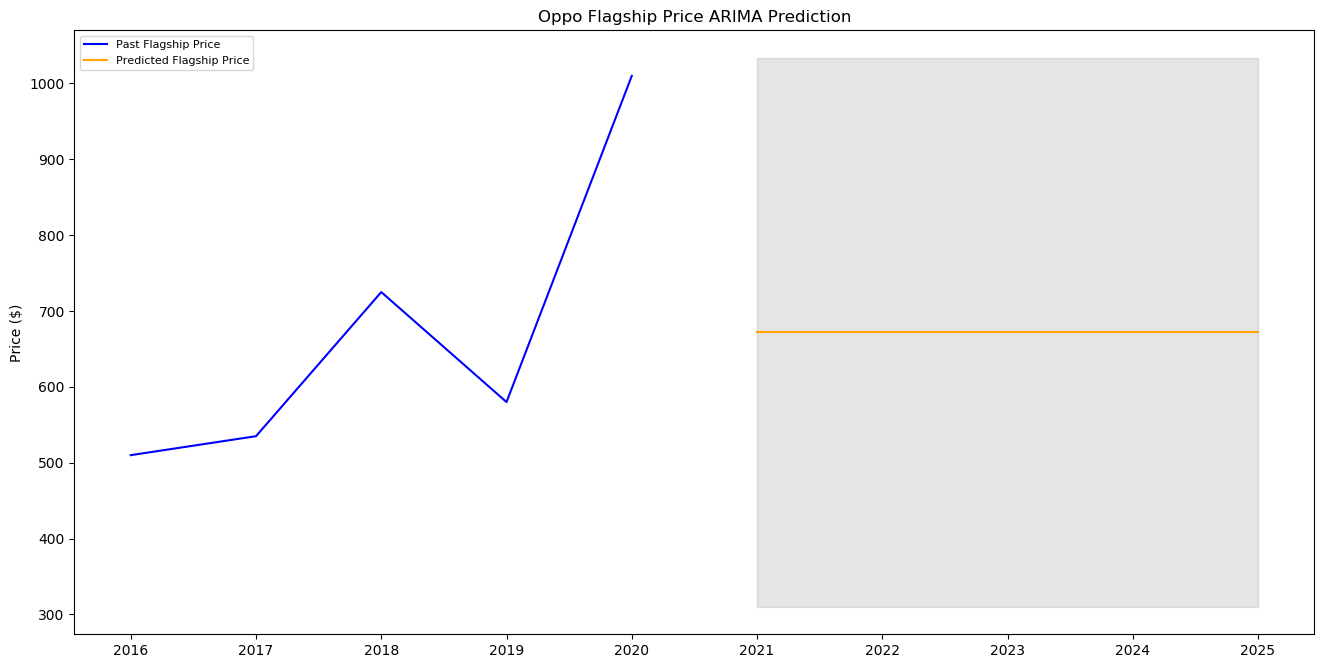

In [388]:
model = ARIMA(df, order=(0, 0, 0))  
fitted = model.fit(disp=-1)  
arima_window = 5
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(2016, 2026):
    indexq.append(str(n))
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Flagship Price ARIMA Prediction')
plt.ylabel('Price ($)')
plt.legend(loc='upper left', fontsize=8)

In [389]:
com = 'Vivo'
df = flagship[[com]].astype(float)
model_autoARIMA = auto_arima(df, start_p=0, start_q=0,
                      max_p=3, max_q=3, 
                      m=1, 
                      d=None, 
                      seasonal=True,
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=62.462, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=64.160, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=80.858, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=73.032, Time=0.07 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.179 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                        SARIMAX   Log Likelihood                 -29.231
Date:                Tue, 25 Aug 2020   AIC                             62.462
Time:                        18:03:53   BIC                             61.681
Sample:                             0   HQIC                            60.366
                                  - 5                                         
Covariance

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


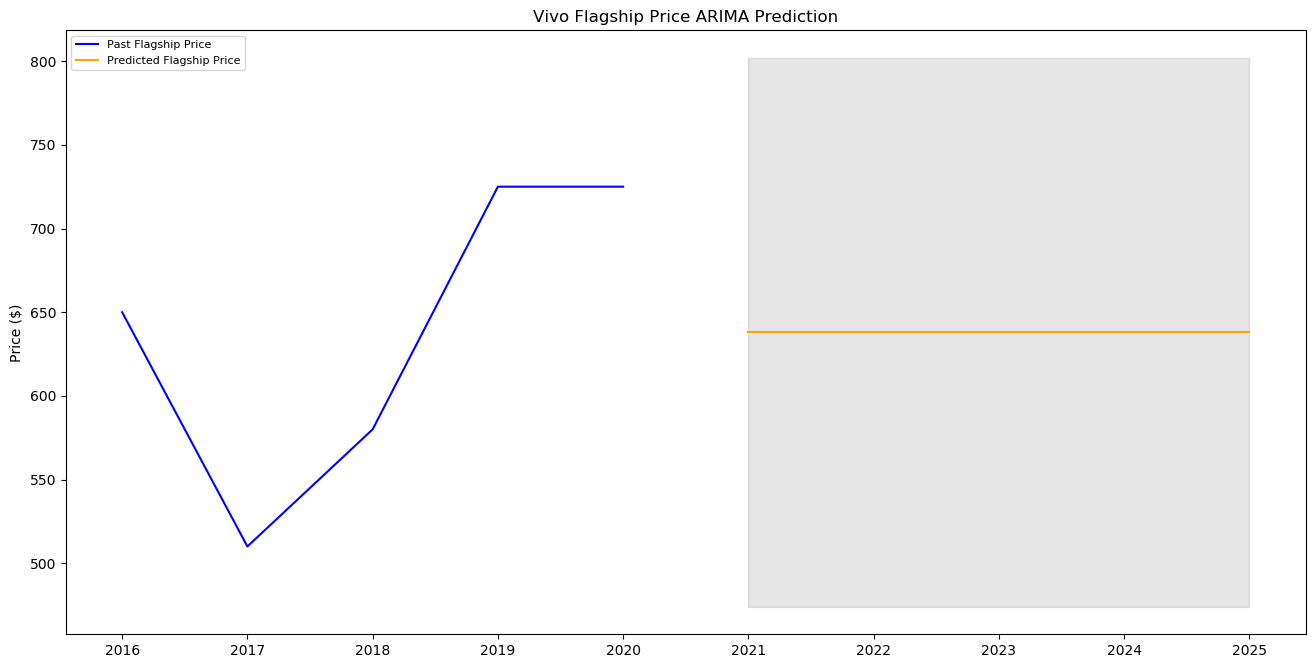

In [390]:
model = ARIMA(df, order=(0, 0, 0))  
fitted = model.fit(disp=-1)  
arima_window = 5
fc, se, conf = fitted.forecast(arima_window, alpha=0.05)
fc_series = pd.Series(fc, index=range(0, arima_window))
fc_series = pd.DataFrame(fc_series, columns=['Prediction'])
df_pred = df.reset_index()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, fc_series])
df_pred = df_pred.reset_index()
lower_series = pd.Series(conf[:, 0], index=df_pred.iloc[-arima_window:].index)
upper_series = pd.Series(conf[:, 1], index=df_pred.iloc[-arima_window:].index)

indexq = []
for n in range(2016, 2026):
    indexq.append(str(n))
df_pred.index=indexq

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)

plt.title(com + ' Flagship Price ARIMA Prediction')
plt.ylabel('Price ($)')
plt.legend(loc='upper left', fontsize=8)

In [234]:
# Linear Regression

In [308]:
import datetime as dt
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MultipleLocator

In [265]:
train_index = []
for n in range (2015, 2021):
    for m in [1, 4, 7, 10]:
        train_index.append(str(n)+'-'+str(m)+'-01')
train_index.pop()
train_index.pop()
train_index.pop(0)
train_index = pd.to_datetime(train_index)

test_index = []
for n in range (2020, 2026):
    for m in [1, 4, 7, 10]:
        test_index.append(str(n)+'-'+str(m)+'-01')
test_index.pop()
test_index.pop(0)
test_index.pop(0)
test_index = pd.to_datetime(test_index)

X = np.array(train_index, dtype=float)
X_test = np.array(test_index, dtype=float)
X = np.reshape(X, (-1, 1))

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


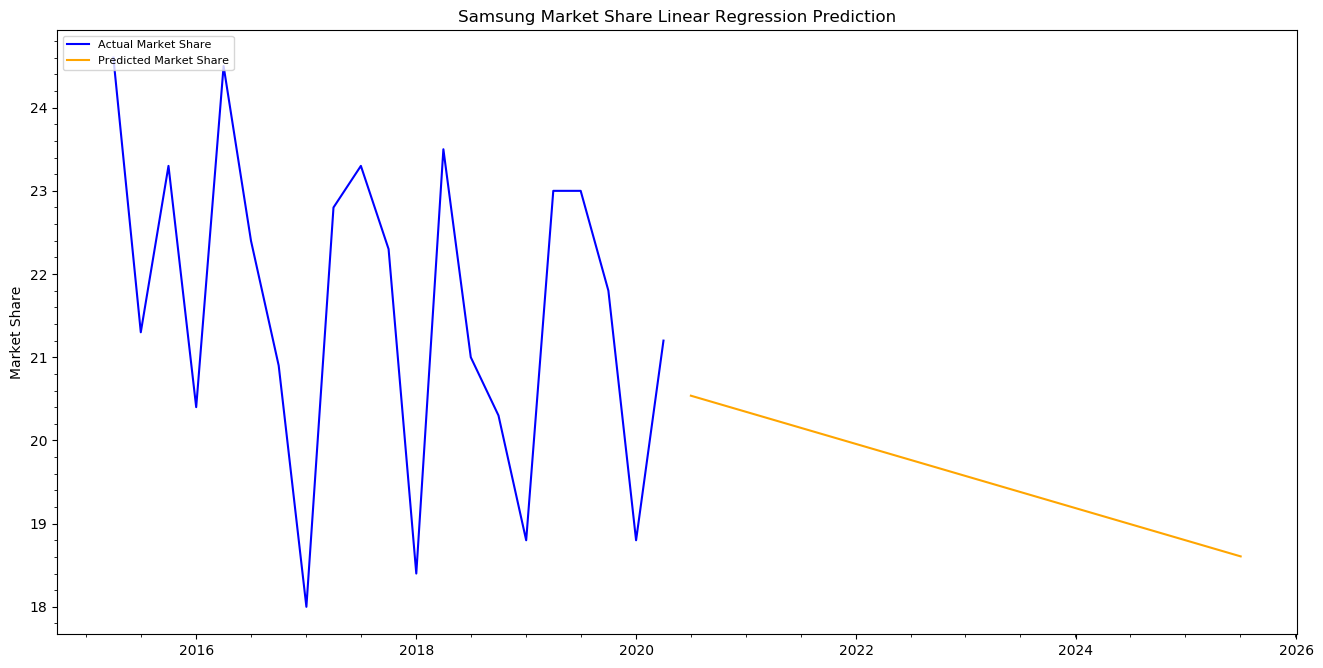

In [352]:
com = 'Samsung'
df = mkt_share[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.title(com + ' Market Share Linear Regression Prediction')
plt.ylabel('Market Share')

plt.axes().minorticks_on()

plt.legend(loc='upper left', fontsize=8)

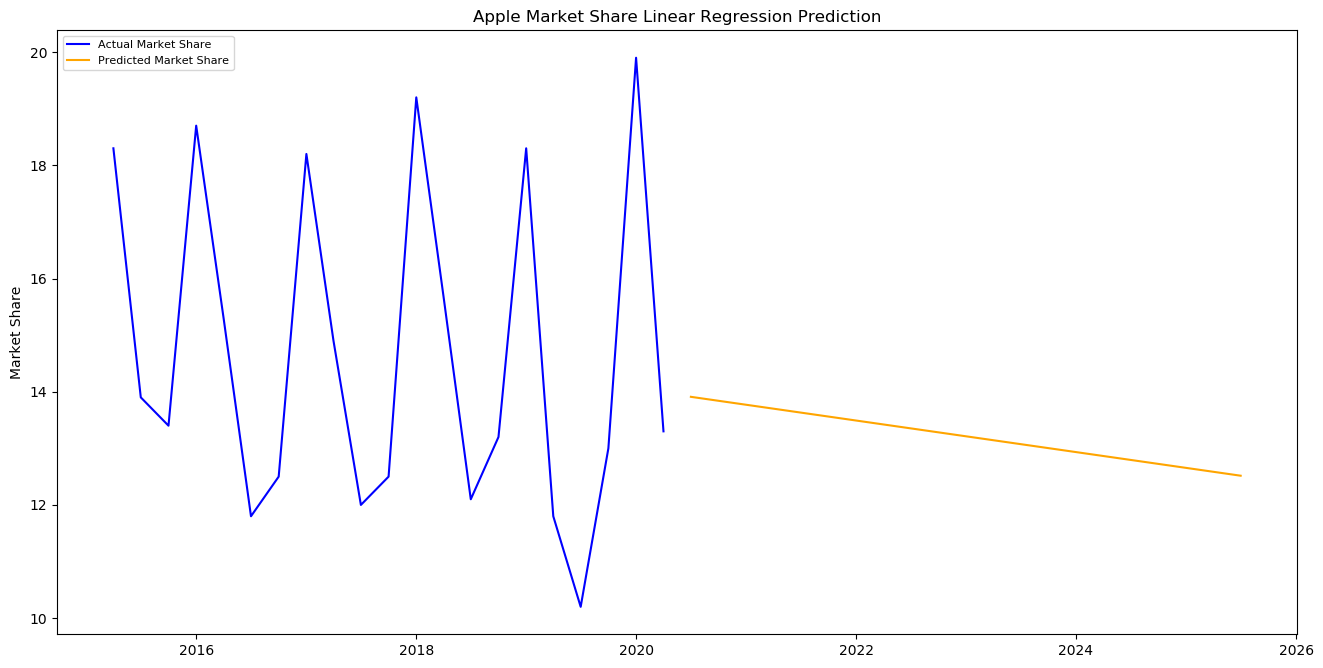

In [353]:
com = 'Apple'
df = mkt_share[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.title(com + ' Market Share Linear Regression Prediction')
plt.ylabel('Market Share')
plt.legend(loc='upper left', fontsize=8)

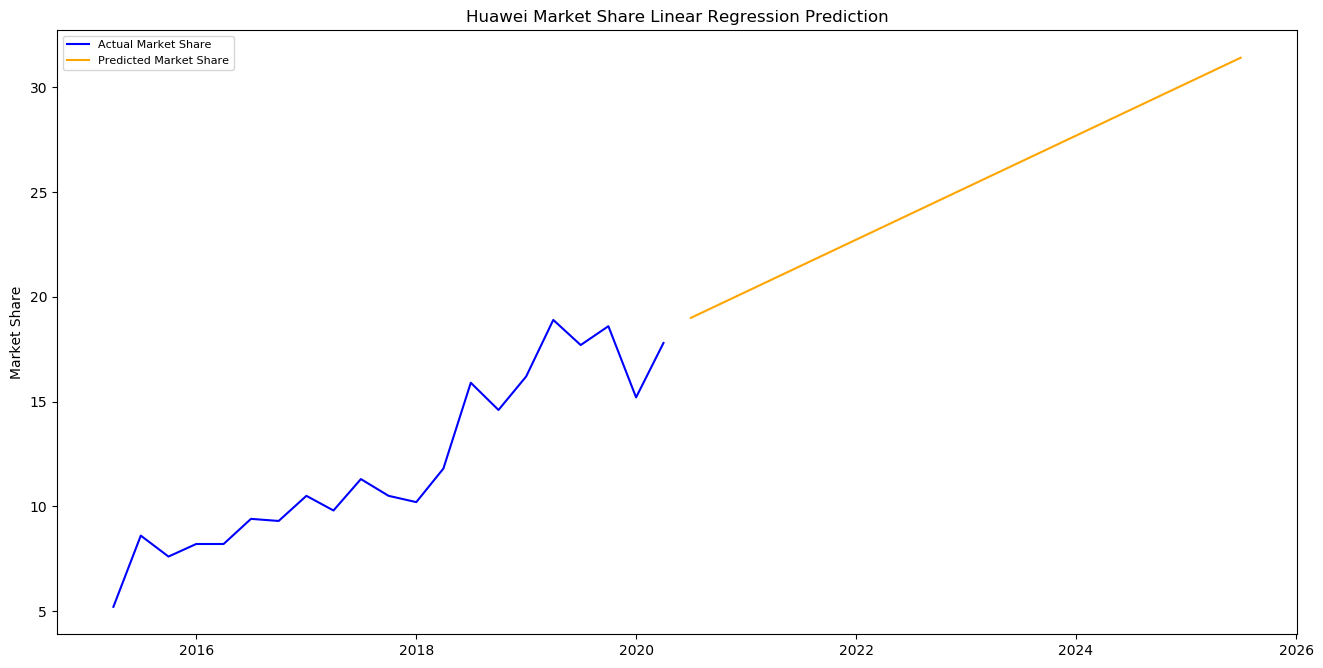

In [354]:
com = 'Huawei'
df = mkt_share[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.title(com + ' Market Share Linear Regression Prediction')
plt.ylabel('Market Share')
plt.legend(loc='upper left', fontsize=8)

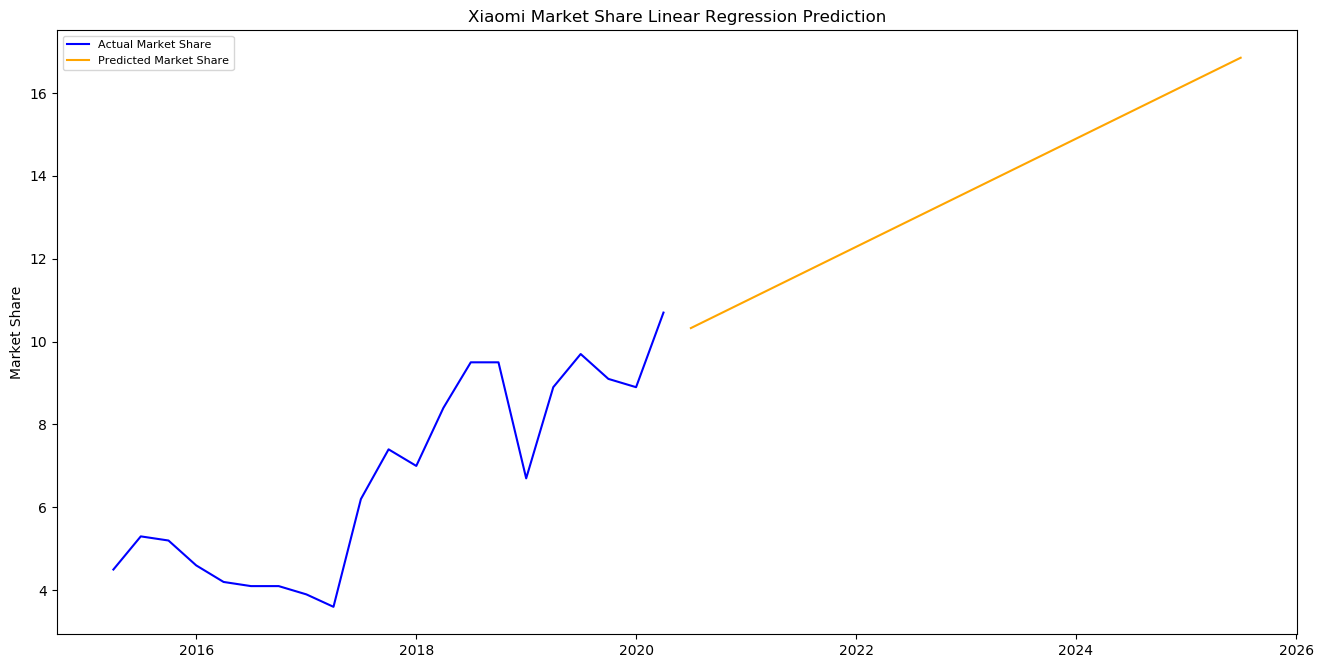

In [355]:
com = 'Xiaomi'
df = mkt_share[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.title(com + ' Market Share Linear Regression Prediction')
plt.ylabel('Market Share')
plt.legend(loc='upper left', fontsize=8)

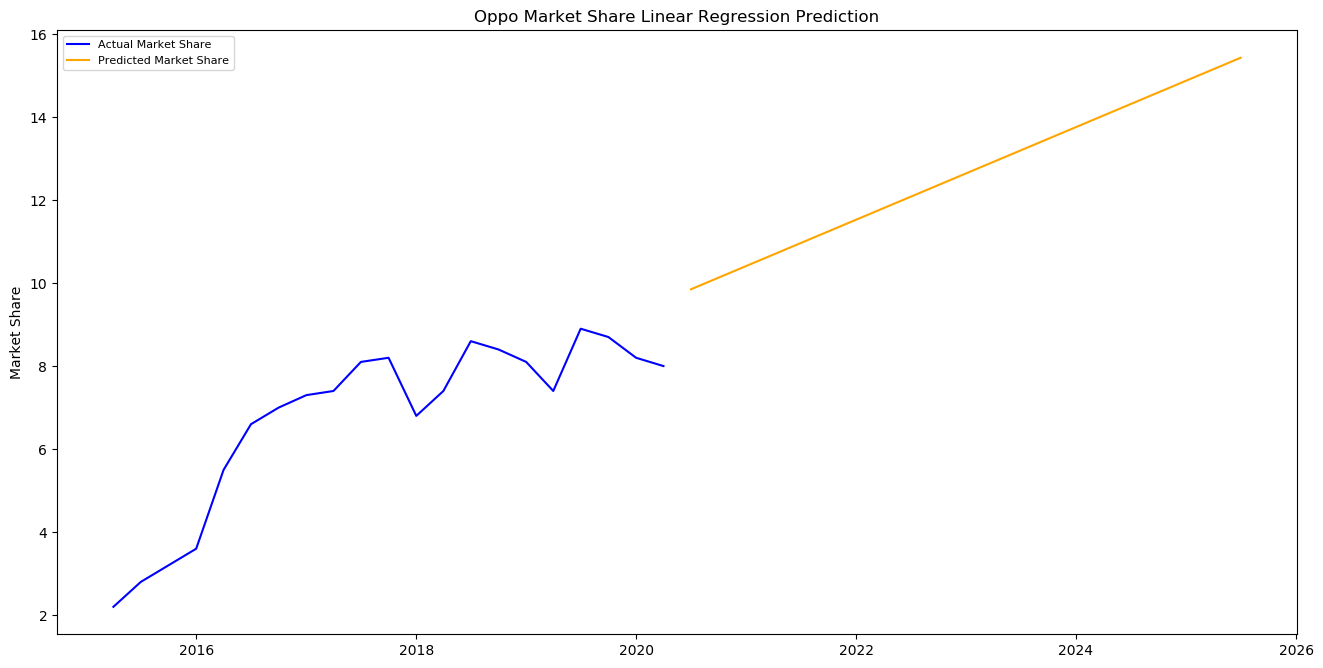

In [356]:
com = 'Oppo'
df = mkt_share[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.title(com + ' Market Share Linear Regression Prediction')
plt.ylabel('Market Share')
plt.legend(loc='upper left', fontsize=8)

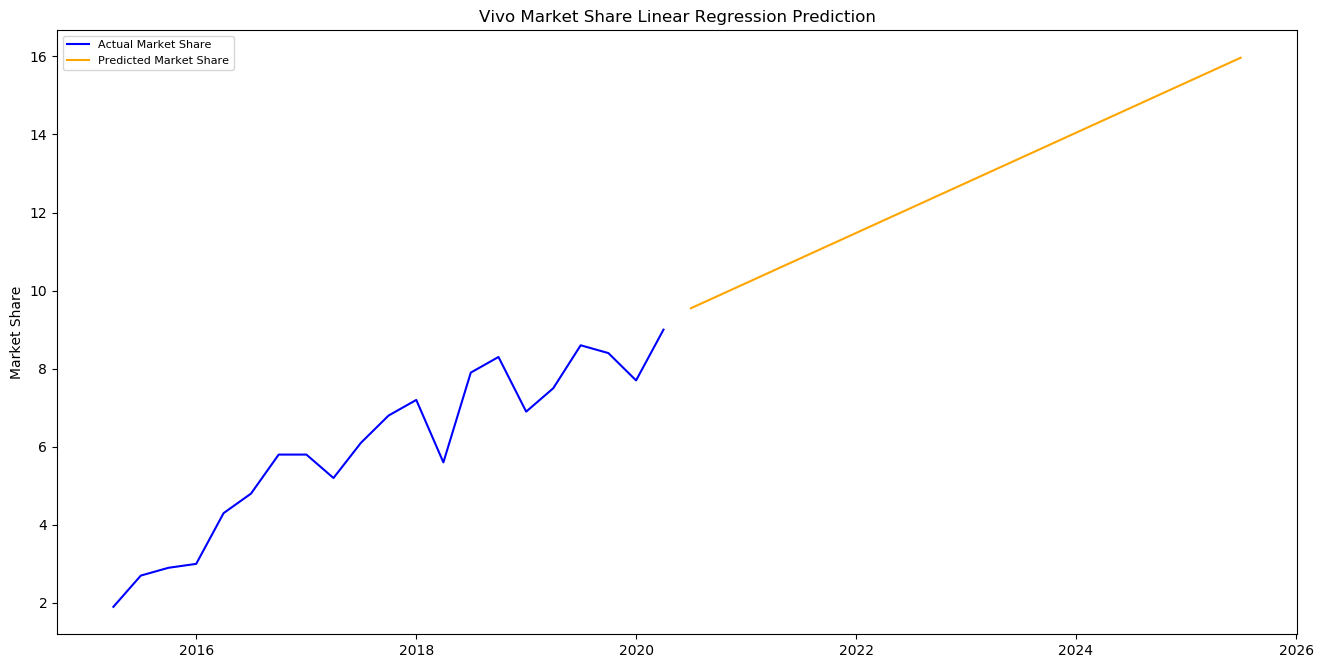

In [357]:
com = 'Vivo'
df = mkt_share[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
plt.plot(df_pred[com], color = 'b', label='Actual Market Share')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Market Share')

plt.title(com + ' Market Share Linear Regression Prediction')
plt.ylabel('Market Share')
plt.legend(loc='upper left', fontsize=8)

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


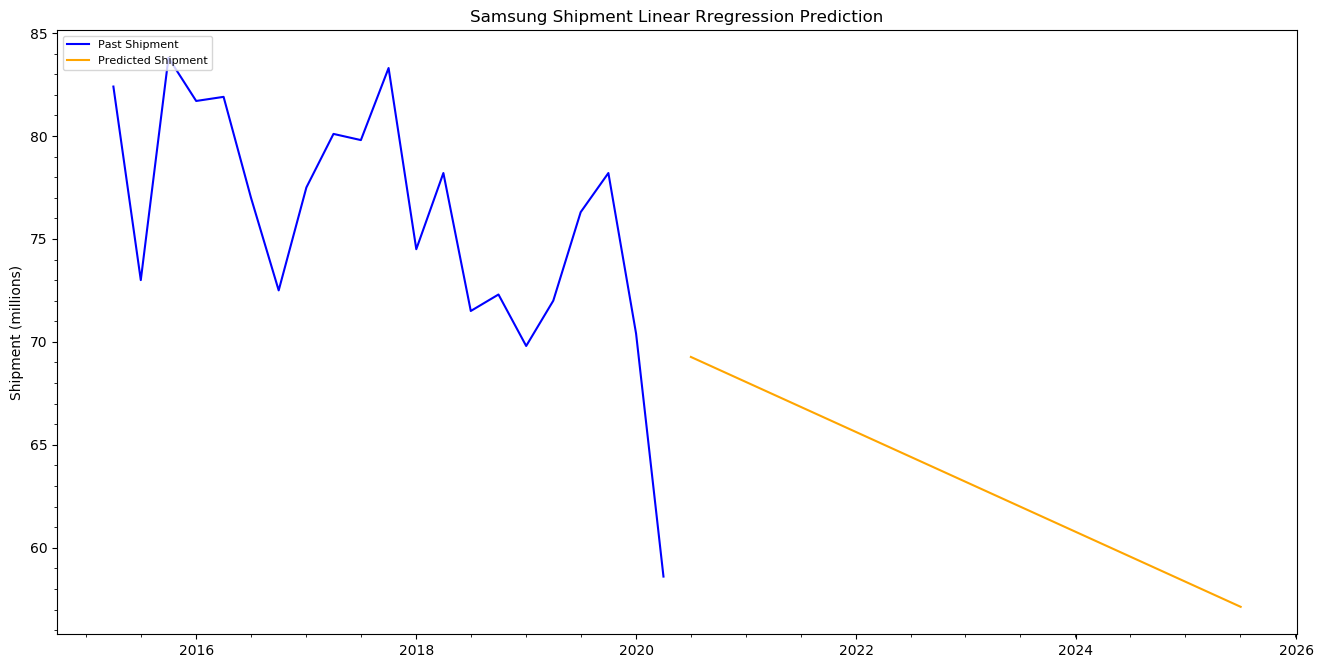

In [360]:
com = 'Samsung'
df = production[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.title(com + ' Shipment Linear Rregression Prediction')
plt.ylabel('Shipment (millions)')

plt.axes().minorticks_on()

plt.legend(loc='upper left', fontsize=8)

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


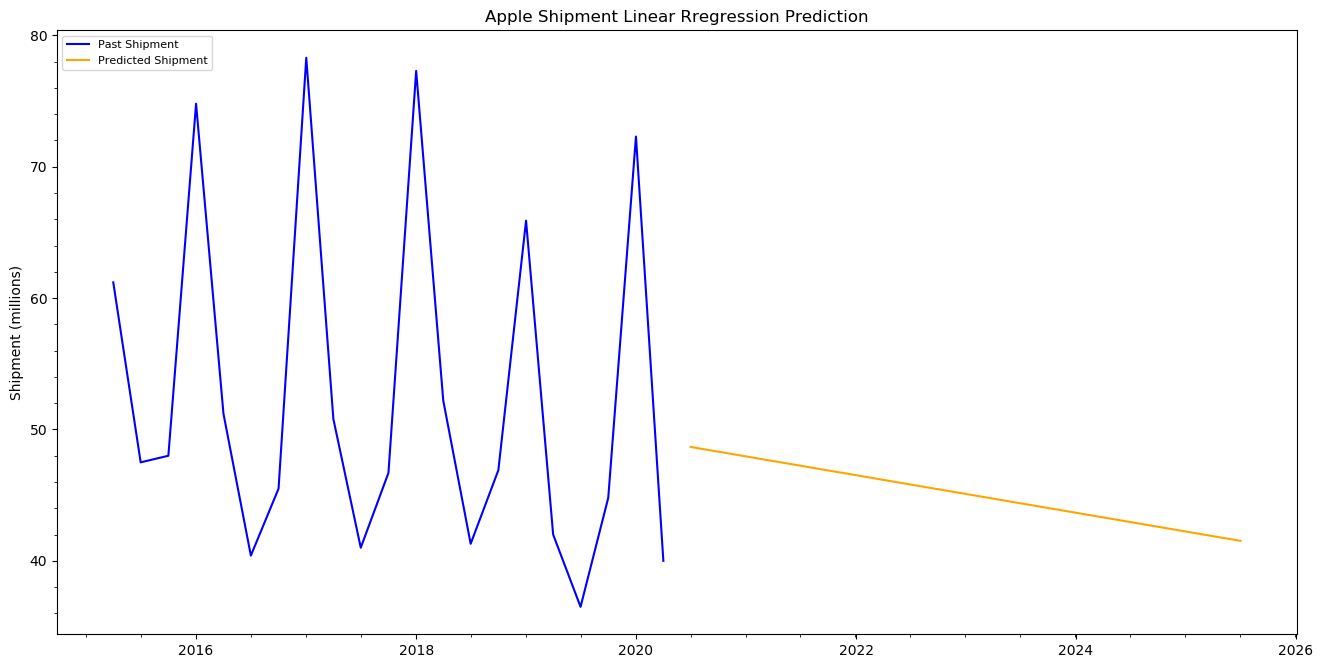

In [361]:
com = 'Apple'
df = production[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.title(com + ' Shipment Linear Rregression Prediction')
plt.ylabel('Shipment (millions)')

plt.axes().minorticks_on()

plt.legend(loc='upper left', fontsize=8)

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


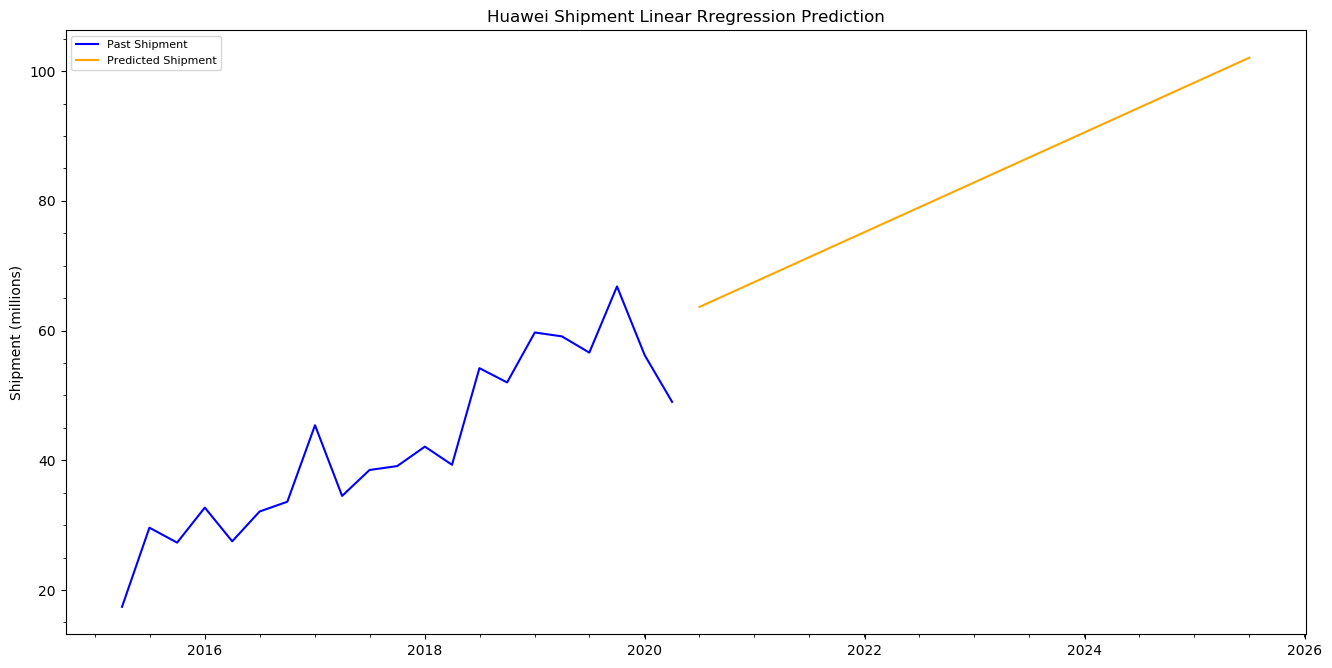

In [362]:
com = 'Huawei'
df = production[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.title(com + ' Shipment Linear Rregression Prediction')
plt.ylabel('Shipment (millions)')

plt.axes().minorticks_on()

plt.legend(loc='upper left', fontsize=8)

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


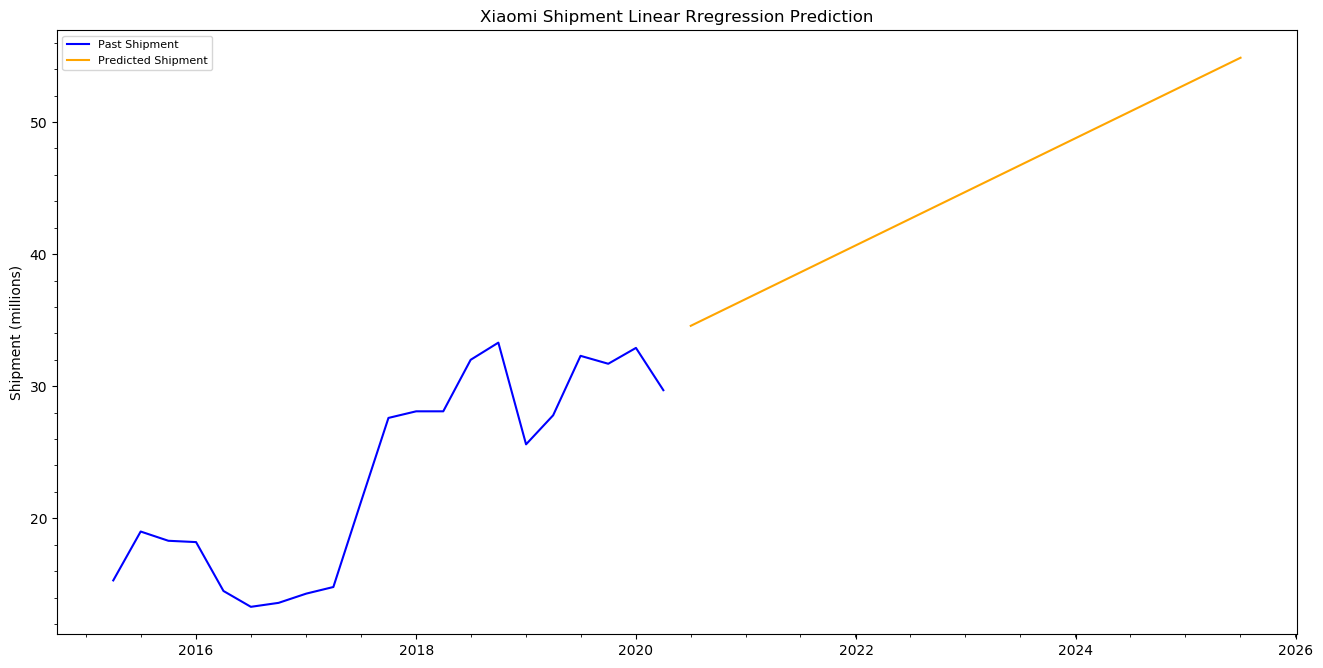

In [363]:
com = 'Xiaomi'
df = production[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.title(com + ' Shipment Linear Rregression Prediction')
plt.ylabel('Shipment (millions)')

plt.axes().minorticks_on()

plt.legend(loc='upper left', fontsize=8)

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


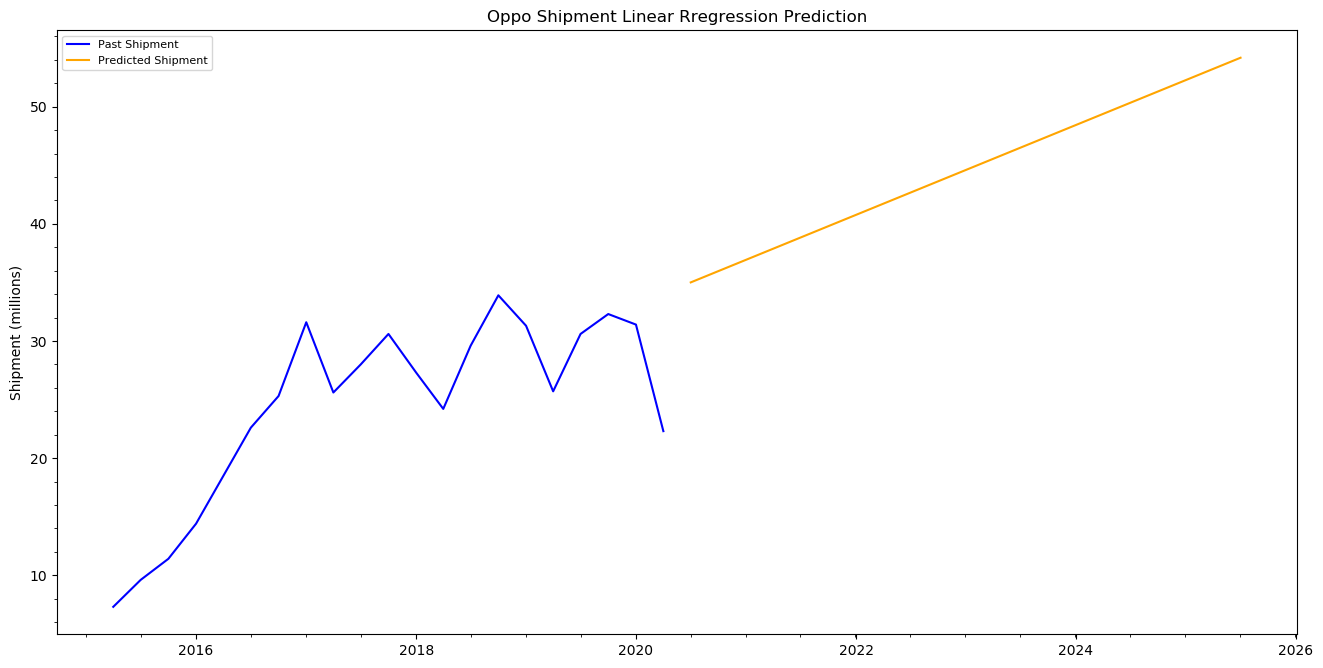

In [364]:
com = 'Oppo'
df = production[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.title(com + ' Shipment Linear Rregression Prediction')
plt.ylabel('Shipment (millions)')

plt.axes().minorticks_on()

plt.legend(loc='upper left', fontsize=8)

/Users/xvantasx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


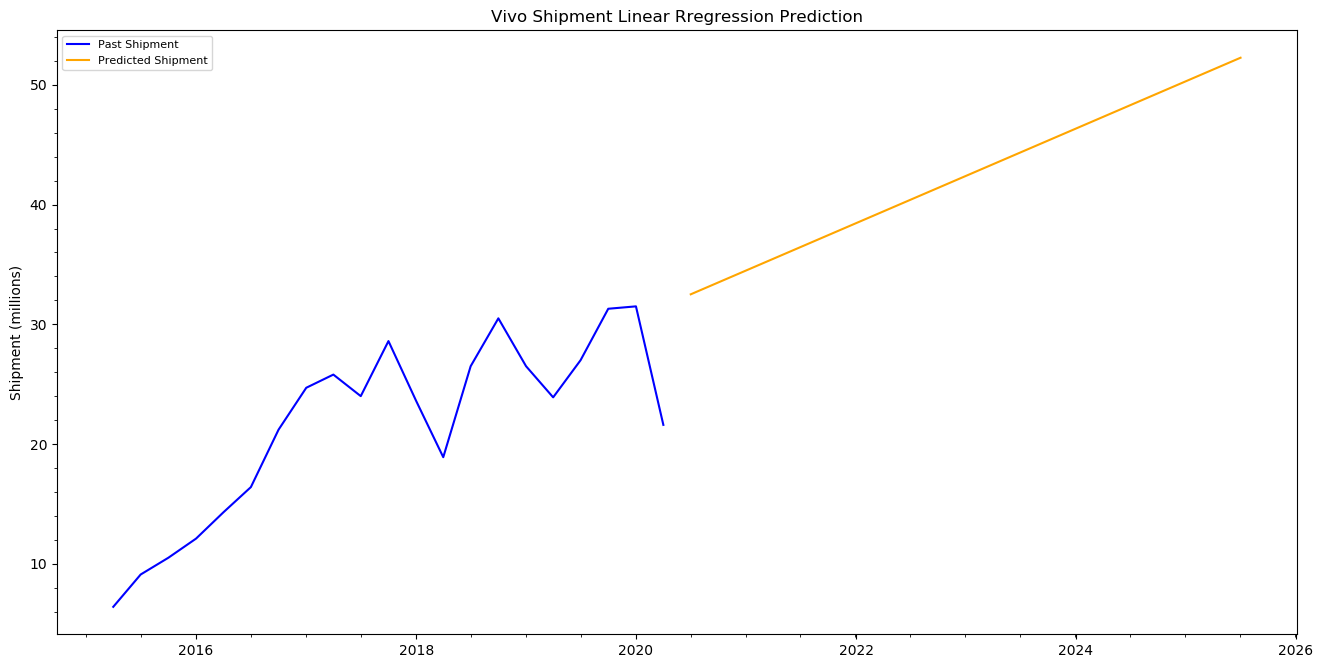

In [378]:
com = 'Vivo'
df = production[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Shipment')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Shipment')

plt.title(com + ' Shipment Linear Rregression Prediction')
plt.ylabel('Shipment (millions)')

plt.axes().minorticks_on()

plt.legend(loc='upper left', fontsize=8)

In [420]:
train_index = []
for n in range (2016, 2020):
    train_index.append(str(n)+'-01-01')
train_index = pd.to_datetime(train_index)

test_index = []
for n in range (2020, 2026):
    test_index.append(str(n)+'-01-01')
test_index = pd.to_datetime(test_index)

X = np.array(train_index, dtype=float)
X_test = np.array(test_index, dtype=float)
X = np.reshape(X, (-1, 1))

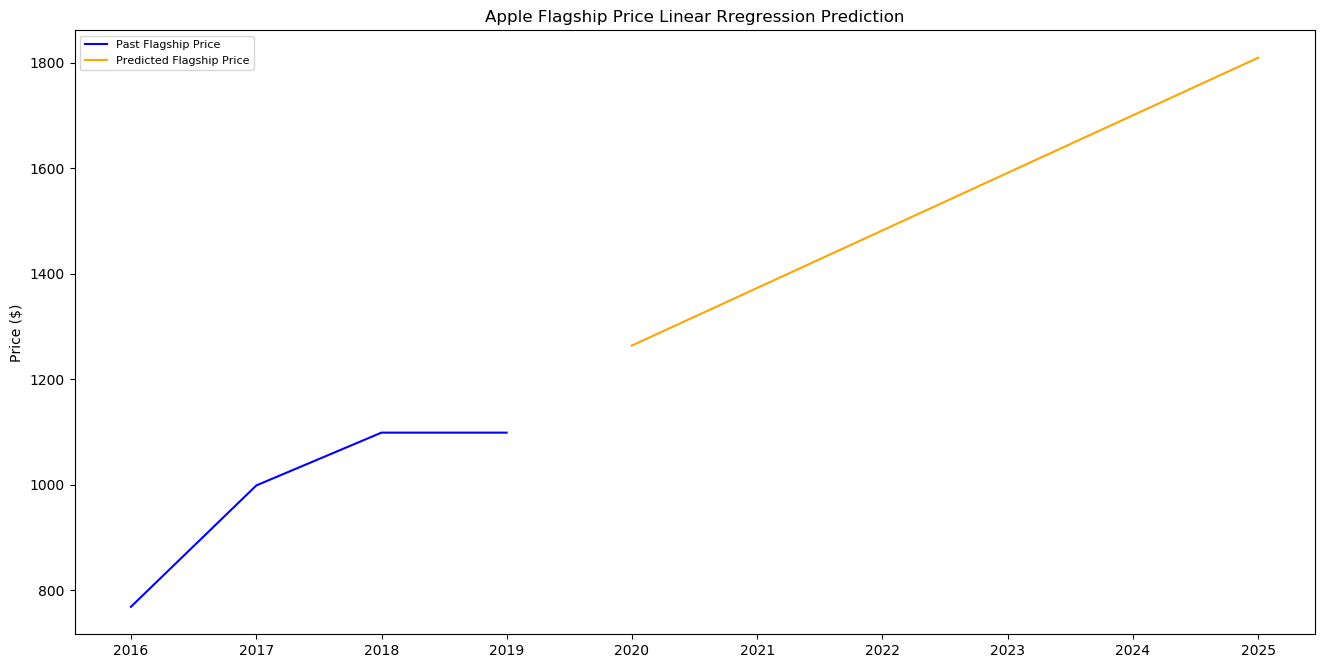

In [421]:
com = 'Apple'
df = flagship[[com]].iloc[:-1]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.title(com + ' Flagship Price Linear Rregression Prediction')
plt.ylabel('Price ($)')

plt.legend(loc='upper left', fontsize=8)

In [422]:
train_index = []
for n in range (2016, 2021):
    train_index.append(str(n)+'-01-01')
train_index = pd.to_datetime(train_index)

test_index = []
for n in range (2021, 2026):
    test_index.append(str(n)+'-01-01')
test_index = pd.to_datetime(test_index)

X = np.array(train_index, dtype=float)
X_test = np.array(test_index, dtype=float)
X = np.reshape(X, (-1, 1))

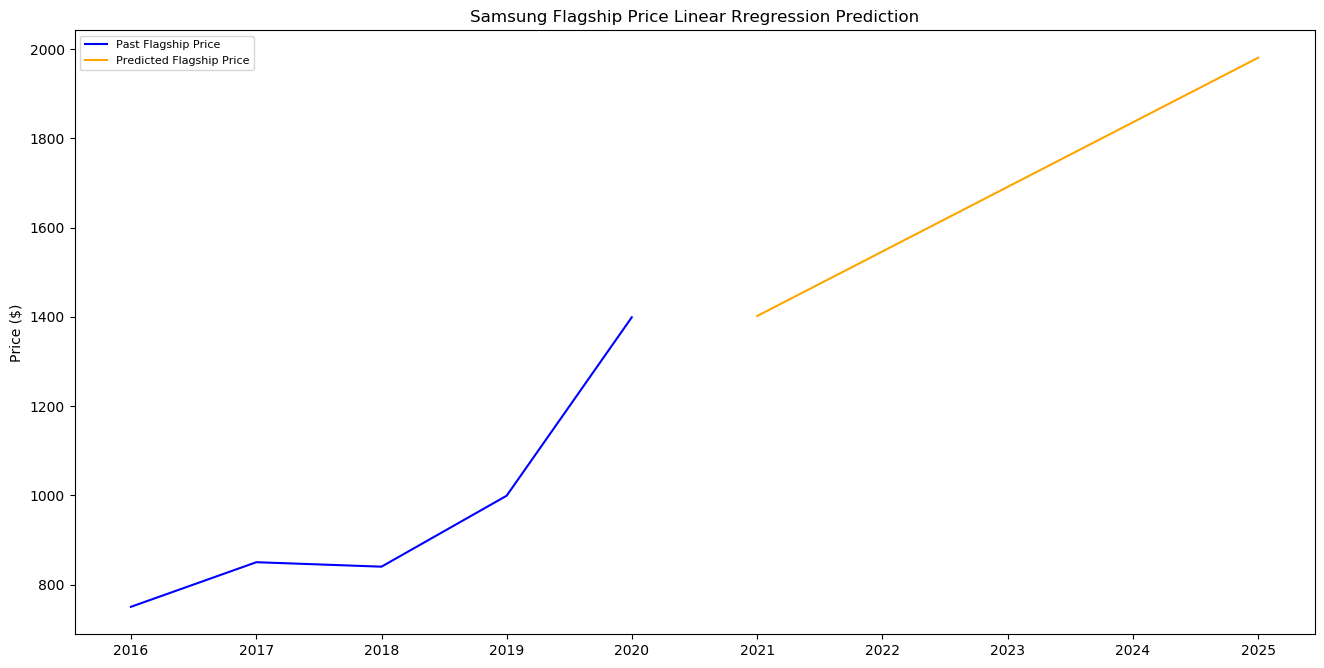

In [423]:
com = 'Samsung'
df = flagship[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.title(com + ' Flagship Price Linear Rregression Prediction')
plt.ylabel('Price ($)')

plt.legend(loc='upper left', fontsize=8)

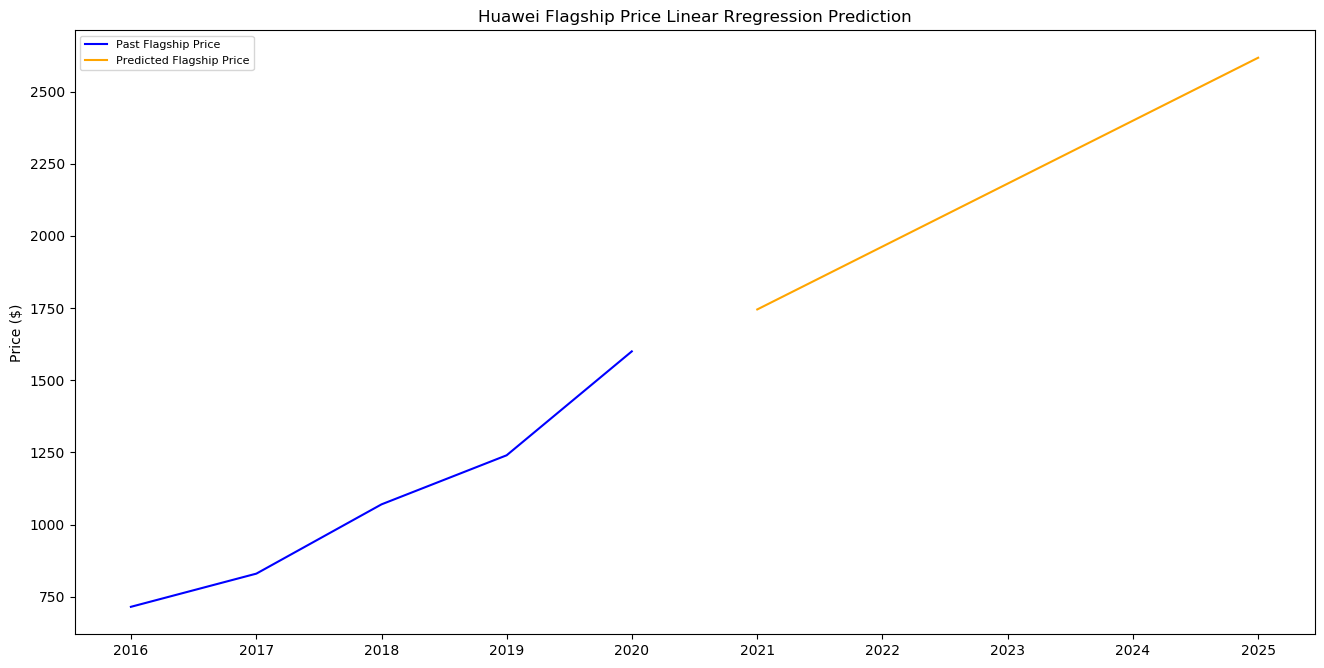

In [424]:
com = 'Huawei'
df = flagship[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.title(com + ' Flagship Price Linear Rregression Prediction')
plt.ylabel('Price ($)')

plt.legend(loc='upper left', fontsize=8)

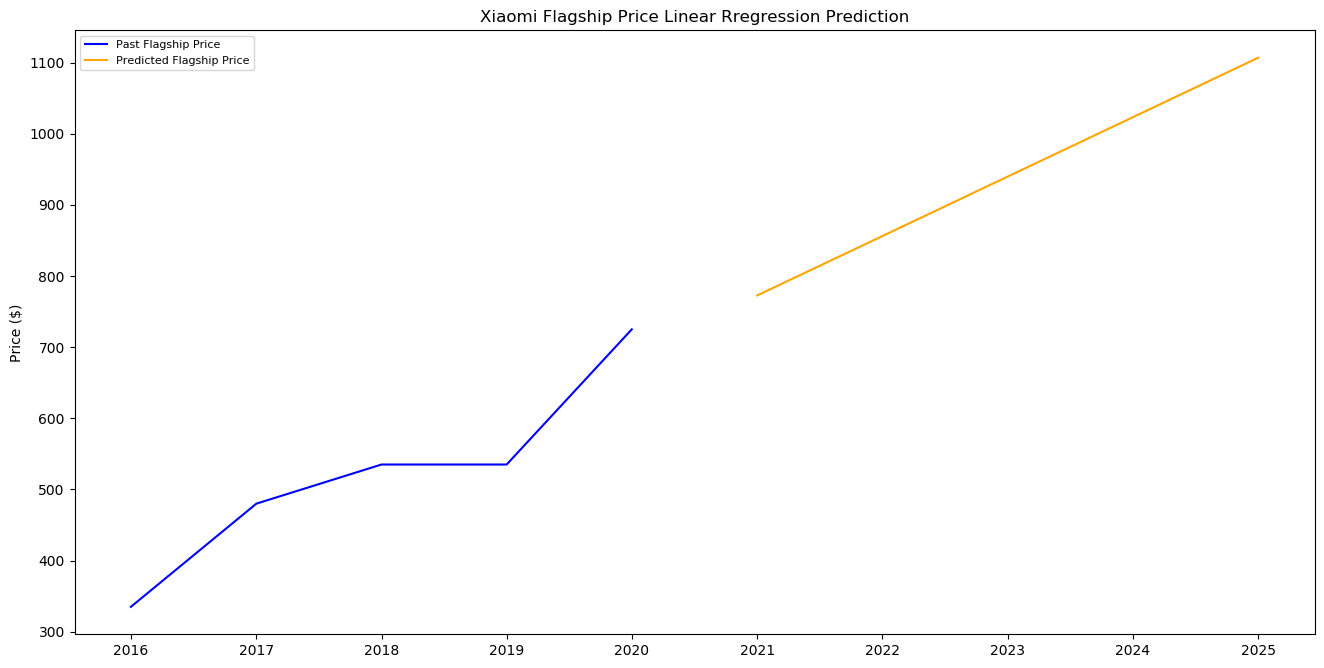

In [425]:
com = 'Xiaomi'
df = flagship[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.title(com + ' Flagship Price Linear Rregression Prediction')
plt.ylabel('Price ($)')

plt.legend(loc='upper left', fontsize=8)

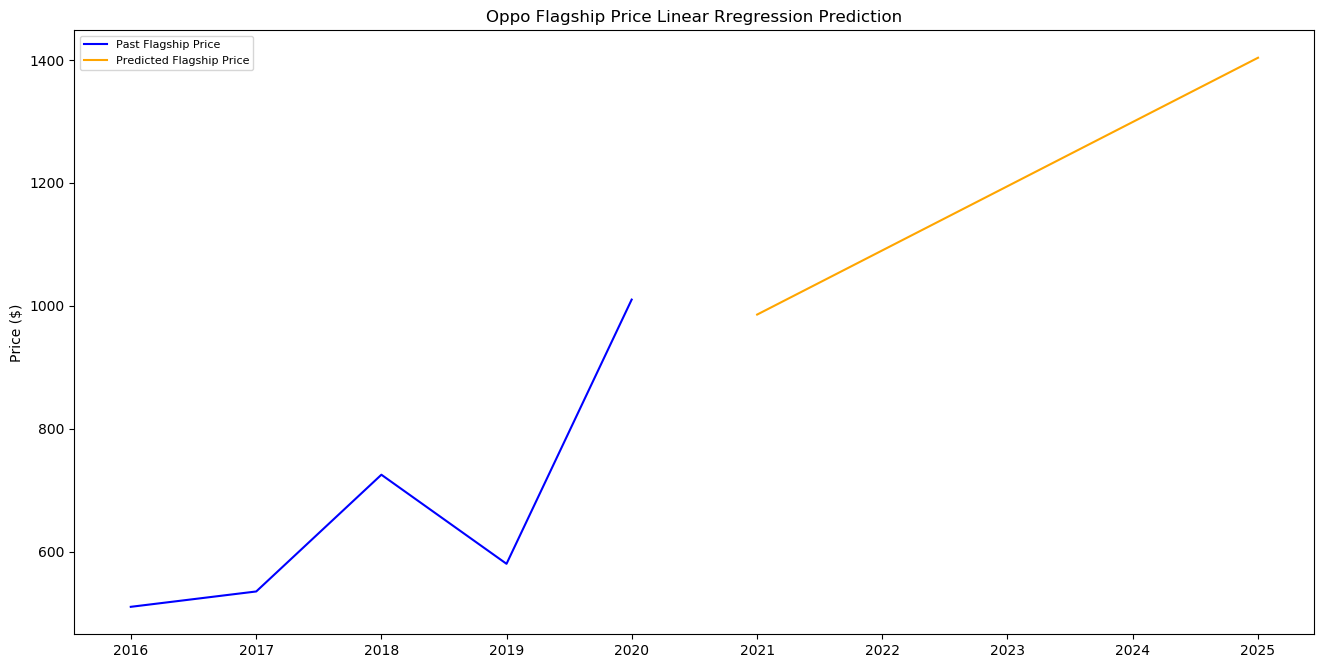

In [426]:
com = 'Oppo'
df = flagship[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.title(com + ' Flagship Price Linear Rregression Prediction')
plt.ylabel('Price ($)')

plt.legend(loc='upper left', fontsize=8)

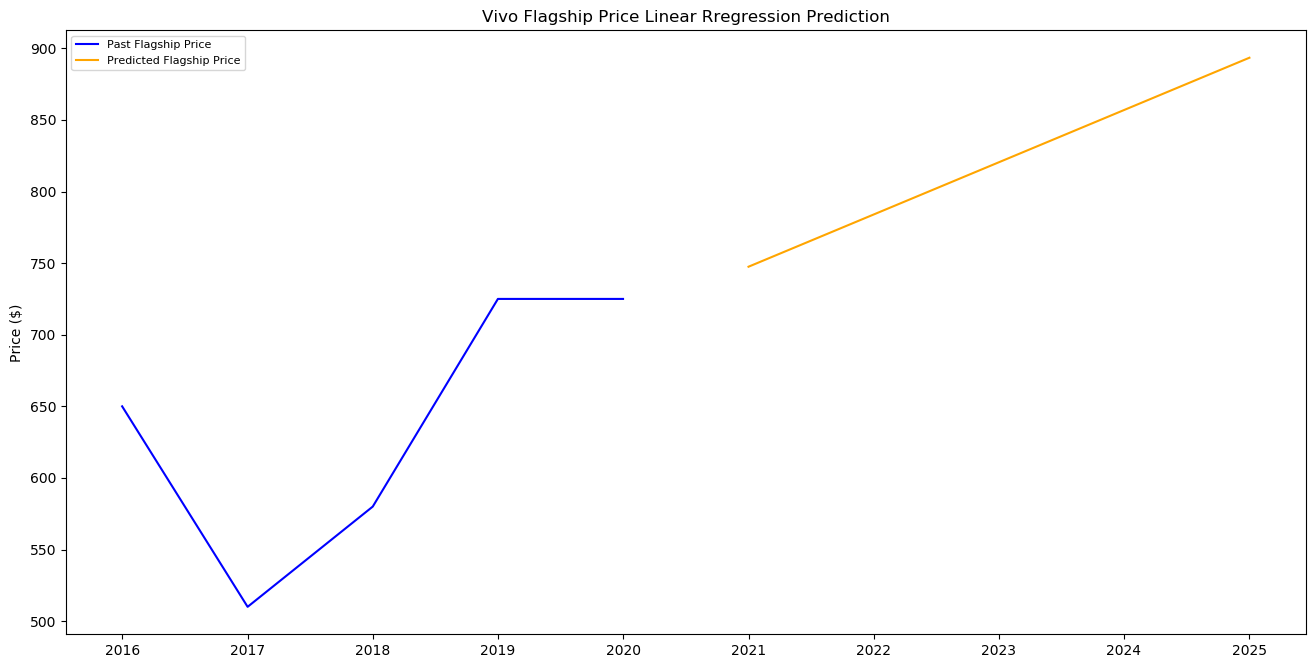

In [427]:
com = 'Vivo'
df = flagship[[com]]
df.index = train_index
y = np.array(df.values, dtype=float)

lm.fit(X, y)

X_test = np.reshape(X_test, (-1, 1))
pred = lm.predict(X_test)
pred = pd.DataFrame(pred, columns=['Prediction'])
pred.index = test_index

df_pred = df.copy()
df_pred['Prediction'] = np.nan
df_pred = pd.concat([df_pred, pred])

plt.figure(figsize=(16, 8), dpi=100)
ax = plt.plot(df_pred[com], color = 'b', label='Past Flagship Price')
plt.plot(df_pred['Prediction'], color = 'orange',label='Predicted Flagship Price')

plt.title(com + ' Flagship Price Linear Rregression Prediction')
plt.ylabel('Price ($)')

plt.legend(loc='upper left', fontsize=8)